In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import my_utils as myf
import matplotlib.path as mpath
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from matplotlib.gridspec import GridSpec
from datetime import datetime
from scipy.stats import linregress
import calendar
from xarrayutils.utils import linear_trend
import seaborn as sns

In [3]:
#Loading reanalysis datasets:
RN_OBS1= xr.open_dataset('/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Reanalysis/GECCO3_heff41S6m_1979-2014_Regridded.nc')
RN_OBS2= xr.open_dataset('/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Reanalysis/GIOMAS_heff_1979-2014_Regridded.nc')
RN_OBS3= xr.open_dataset('/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Reanalysis/CMCC_GREP_1993-2014_fixed_remapbilled.nc')

In [4]:
RN_OBS3 = RN_OBS3.rename(time_counter='time')

In [5]:
#Loading Satellite (EV-CS2) datsets:
SIC_Areacelli = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/SIC_CMIP6/Regridded_SIC_With_AREACELLI/Regridded_seaice_conc_monthly_sh_NASA_Bootstrap.nsidc.v03r01.197811-201702.nc'
Regridded_SIT_Obs = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Regridded_SIT_With_AREACELLI/SIT_SH_50-90_SIRAL-SH50KMEASE2-200206-201704_regridded.nc'
sit_Obs_Regridded = xr.open_dataset(Regridded_SIT_Obs).sea_ice_thickness.sel(time=slice('2002-06-01','2014-12-01'))
SIC_Obs_Regridded = xr.open_dataset(SIC_Areacelli).SIC.sel(time=slice('2002-06-01','2014-12-01'))

### Loading CMIP6 Models for "siconc" and "sithick" variables:

In [6]:
mydir = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/Regridded_SIT_With_AREACELLI/'
mydir1 = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/SIC_CMIP6/Regridded_SIC_With_AREACELLI/'

In [7]:
Observ = '/Volumes/SHREYA/Advanced_Climatology/Final_Project/SIT_SH_50-90_SIRAL-SH50KMEASE2-200206-201704.nc'
Obs_SIC = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Regridded_seaice_conc_monthly_sh_NASA_Bootstrap.nsidc.v03r01.197811-201702.nc'
DS_Areacelli = '/Volumes/SHREYA/Advanced_Climatology/All_Models/Weighted_SIT/AREACELLI/areacelli_Ofx_NESM3_lig127k_r1i1p1f1_gn_SH.nc'

In [8]:
myfiles = [f for f in sorted(os.listdir(mydir)) if 'sithick_SImon' in f if not 'TaiESM1' in f]
myfiles1 = [f for f in sorted(os.listdir(mydir1)) if 'siconc_SImon' in f if not 'TaiESM1' in f]

In [9]:
# Files not present for SIC:
# sithick_SImon_AWI-CM-1-1-MR_historical_r1i1p1f1_gn_200101-201412_SH.nc
# sithick_SImon_CNRM-CM6-1-HR_historical_r1i1p1f2_gn_185001-201412_SH.nc
# sithick_SImon_GISS-E2-1-G_historical_r1i1p3f1_gn_200101-201412_SH.nc
# sithick_SImon_KACE-1-0-G_historical_r1i1p1f1_gr_185001-201412_SH.nc
# sithick_SImon_MCM-UA-1-0_historical_r1i1p1f2_gn_185001-201412_SH.nc
# sithick_SImon_MIROC-ES2H_historical_r1i1p4f2_gn_185001-201412_SH.nc

In [10]:
print(len(myfiles))
print(len(myfiles1))

35
35


In [11]:
# SIT Datasets:
ds_sit_1 = xr.open_dataset(mydir+myfiles[0])
ds_sit_2 = xr.open_dataset(mydir+myfiles[1])
ds_sit_3 = xr.open_dataset(mydir+myfiles[2])
ds_sit_4 = xr.open_dataset(mydir+myfiles[3])
ds_sit_5 = xr.open_dataset(mydir+myfiles[4])
ds_sit_6 = xr.open_dataset(mydir+myfiles[5])
ds_sit_7 = xr.open_dataset(mydir+myfiles[6])
ds_sit_8 = xr.open_dataset(mydir+myfiles[7])
ds_sit_9 = xr.open_dataset(mydir+myfiles[8])
ds_sit_10 = xr.open_dataset(mydir+myfiles[9])
ds_sit_11 = xr.open_dataset(mydir+myfiles[10])
ds_sit_12 = xr.open_dataset(mydir+myfiles[11])
ds_sit_13 = xr.open_dataset(mydir+myfiles[12])
ds_sit_14 = xr.open_dataset(mydir+myfiles[13])
ds_sit_15 = xr.open_dataset(mydir+myfiles[14])
ds_sit_16 = xr.open_dataset(mydir+myfiles[15])
ds_sit_17 = xr.open_dataset(mydir+myfiles[16])
ds_sit_18 = xr.open_dataset(mydir+myfiles[17])
ds_sit_19 = xr.open_dataset(mydir+myfiles[18])
ds_sit_20 = xr.open_dataset(mydir+myfiles[19])
ds_sit_21 = xr.open_dataset(mydir+myfiles[20])
ds_sit_22 = xr.open_dataset(mydir+myfiles[21])
ds_sit_23 = xr.open_dataset(mydir+myfiles[22])
ds_sit_24 = xr.open_dataset(mydir+myfiles[23])
ds_sit_25 = xr.open_dataset(mydir+myfiles[24])
ds_sit_26 = xr.open_dataset(mydir+myfiles[25])
ds_sit_27 = xr.open_dataset(mydir+myfiles[26])
ds_sit_28 = xr.open_dataset(mydir+myfiles[27])
ds_sit_29 = xr.open_dataset(mydir+myfiles[28])
ds_sit_30 = xr.open_dataset(mydir+myfiles[29])
ds_sit_31 = xr.open_dataset(mydir+myfiles[30])
ds_sit_32 = xr.open_dataset(mydir+myfiles[31])
ds_sit_33 = xr.open_dataset(mydir+myfiles[32])
ds_sit_34 = xr.open_dataset(mydir+myfiles[33])
ds_sit_35 = xr.open_dataset(mydir+myfiles[34])


ds_sit_Ob = xr.open_dataset(Observ)
ds_sic_Ob = xr.open_dataset(Obs_SIC)
areacelli = xr.open_dataset(DS_Areacelli)

In [12]:
# sic Datasets:
ds_sic_1 = xr.open_dataset(mydir1+myfiles1[0]) 
ds_sic_2 = xr.open_dataset(mydir1+myfiles1[1]) 
ds_sic_3 = xr.open_dataset(mydir1+myfiles1[2])
ds_sic_4 = xr.open_dataset(mydir1+myfiles1[3])
ds_sic_5 = xr.open_dataset(mydir1+myfiles1[4])
ds_sic_6 = xr.open_dataset(mydir1+myfiles1[5])
ds_sic_7 = xr.open_dataset(mydir1+myfiles1[6])
ds_sic_8 = xr.open_dataset(mydir1+myfiles1[7])
ds_sic_9 = xr.open_dataset(mydir1+myfiles1[8])
ds_sic_10 = xr.open_dataset(mydir1+myfiles1[9])
ds_sic_11 = xr.open_dataset(mydir1+myfiles1[10])
ds_sic_12 = xr.open_dataset(mydir1+myfiles1[11])
ds_sic_13 = xr.open_dataset(mydir1+myfiles1[12])
ds_sic_14 = xr.open_dataset(mydir1+myfiles1[13])
ds_sic_15 = xr.open_dataset(mydir1+myfiles1[14])
ds_sic_16 = xr.open_dataset(mydir1+myfiles1[15])
ds_sic_17 = xr.open_dataset(mydir1+myfiles1[16])
ds_sic_18 = xr.open_dataset(mydir1+myfiles1[17])
ds_sic_19 = xr.open_dataset(mydir1+myfiles1[18])
ds_sic_20 = xr.open_dataset(mydir1+myfiles1[19])
ds_sic_21 = xr.open_dataset(mydir1+myfiles1[20])
ds_sic_22 = xr.open_dataset(mydir1+myfiles1[21])
ds_sic_23 = xr.open_dataset(mydir1+myfiles1[22])
ds_sic_24 = xr.open_dataset(mydir1+myfiles1[23])
ds_sic_25 = xr.open_dataset(mydir1+myfiles1[24])
ds_sic_26 = xr.open_dataset(mydir1+myfiles1[25])
ds_sic_27 = xr.open_dataset(mydir1+myfiles1[26])
ds_sic_28 = xr.open_dataset(mydir1+myfiles1[27])
ds_sic_29 = xr.open_dataset(mydir1+myfiles1[28])
ds_sic_30 = xr.open_dataset(mydir1+myfiles1[29])
ds_sic_31 = xr.open_dataset(mydir1+myfiles1[30])
ds_sic_32 = xr.open_dataset(mydir1+myfiles1[31])
ds_sic_33 = xr.open_dataset(mydir1+myfiles1[32])
ds_sic_34 = xr.open_dataset(mydir1+myfiles1[33])
ds_sic_35 = xr.open_dataset(mydir1+myfiles1[34])


In [13]:
NSIDC_SIC = xr.open_dataset(SIC_Areacelli)

In [14]:
#For GIOMAS and GECCO3:
SIC_Reanan = NSIDC_SIC.SIC.sel(time=slice('1979-01-01','2014-12-01'))
SIC_Reanan_clm = SIC_Reanan.groupby('time.month').mean(dim='time')

#For GREP:
SIC_Reanan1 = NSIDC_SIC.SIC.sel(time=slice('1993-01-01','2014-12-01'))
SIC_Reanan_clm1 = SIC_Reanan1.groupby('time.month').mean(dim='time')

In [15]:
GECCO_SIT = RN_OBS1.heff

GIOMAS_SIT = RN_OBS2.heff
GIOMAS_SIT = GIOMAS_SIT.where(GIOMAS_SIT < 5)

GREP_SIT = RN_OBS3.iicethic

In [16]:
wgt_gc_models = areacelli.areacelli
wgt_gc_Obs    = np.cos(np.deg2rad(ds_sit_Ob.lat))

In [16]:
# Mod_VOL = ((ds_sic_1.siconc.sel(time=slice('1979-01-01','2015-01-01'))*ds_sit_1.sithick.sel(time=
#            slice('1979-01-01','2015-01-01'))*wgt_gc_models).groupby('time.month').mean(dim='time'))/100

# GIOMAS = (SIC_Reanan*GIOMAS_SIT*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)
# GECCO3 = (SIC_Reanan*GECCO_SIT*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)
# GREP = (((GREP_SIT*wgt_gc_models).groupby('time.month').mean(dim='time'))*SIC_Reanan_clm1).weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)

# EV_CS = (sit_Obs_Regridded*SIC_Obs_Regridded*wgt_gc_models).groupby('time.month').mean(dim='time').weighted(wgt_gc_models.fillna(0)).sum(dim=('ni','nj'),skipna=True)

### Effective thickness vs. Floe thickness:

In the models, the variable 'sithick' gives floe thickness hence, we multiply it with the SIC to convert it into effective thickness. Thereafter we multiply it with areacelli to get the volumes. 

For the observations, we already have the effective thicknesses, hence we multiply them only with the gridcell area for the volumes. 

In [17]:
#Observation based volumes: 
GIOMAS = ((GIOMAS_SIT*wgt_gc_models).groupby('time.month').mean(dim='time')).sum(dim=('ni','nj'),skipna=True)
GECCO3 = ((GECCO_SIT*wgt_gc_models).groupby('time.month').mean(dim='time')).sum(dim=('ni','nj'),skipna=True)
GREP = ((GREP_SIT*wgt_gc_models).groupby('time.month').mean(dim='time')).sum(dim=('ni','nj'),skipna=True)

EV_CS = ((sit_Obs_Regridded*wgt_gc_models).groupby('time.month').mean(dim='time')).sum(dim=('ni','nj'),skipna=True)

In [18]:
sit_Obs = ds_sit_Ob.sea_ice_thickness.sel(time=slice('2002-06-01','2014-12-01'))
clm_sit_Obs = sit_Obs.groupby('time.month').mean(dim='time')
anm_sit_Obs = (sit_Obs.groupby('time.month') - clm_sit_Obs)

time    = anm_sit_Obs.time
time1   = clm_sit_Obs.month

In [19]:
sic_Obs = ds_sic_Ob.SIC.sel(time=slice('2002-06-01','2014-12-01'))
clm_sic_Obs = sic_Obs.groupby('time.month').mean(dim='time')
anm_sic_Obs = (sic_Obs.groupby('time.month') - clm_sic_Obs)
# time2    = anm_sic_Obs.time
# time12   = clm_sic_Obs.month

In [20]:
def clim_anom(data):
    sit = data.sithick.sel(time=slice('2002-06-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [21]:
def clim_anom_sic(data):
    sic = data.siconc.sel(time=slice('2002-06-01','2015-01-01'))
    clm = sic.groupby('time.month').mean(dim='time')
    anm = (sic.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sic)

# Making dataframes for the SIT Means:

### First, making dataframes for volumes using reanalysis for comparisons:  
### For seasonal cycle:

Calculated the volume by multiplying SIT, SIC and grid cell area. 
This done for the the reanalysis datasets and modelled datasets. (1979-2014)

In [22]:
# function for calculating the volumes: 

def Mod_Vols_RN(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('1979-01-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('1979-01-01','2015-01-01'))*Area).groupby('time.month').mean(dim='time'))/100).sum(dim=('ni','nj'),skipna=True)
    return(Volume)

In [23]:
def Mod_Vols(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('1979-01-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('1979-01-01','2015-01-01'))*Area))/100)
    clm = Volume.groupby('time.month').mean(dim='time')
    anm = (Volume.groupby('time.month') - clm)
    return(Volume,clm,anm)

In [48]:
def RN_Vols(SIT,Area):
    Volume = SIT*Area
    clm = Volume.groupby('time.month').mean(dim='time')
    anm = (Volume.groupby('time.month') - clm)
    return(Volume,clm,anm)

In [25]:
def clim_anom(data):
    sit = data.sithick.sel(time=slice('2002-06-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [26]:
print(ds_sic_13.attrs['source_id'],
      ds_sic_15.attrs['source_id'],
      ds_sic_16.attrs['source_id'],
      ds_sic_17.attrs['source_id'],
      ds_sic_18.attrs['source_id'],
      ds_sic_19.attrs['source_id'])

E3SM-1-1-ECA EC-Earth3-AerChem EC-Earth3-CC EC-Earth3-Veg-LR EC-Earth3-Veg EC-Earth3


In [27]:
# Dataframe for SIV Averages:

# excluded are the models with extreme values:

Mod_RN_ACycle_list = pd.DataFrame(
    {'Time': GIOMAS.month,
     ds_sic_1.attrs['source_id']: Mod_Vols_RN(ds_sic_1,ds_sit_1,wgt_gc_models),
     ds_sic_2.attrs['source_id']: Mod_Vols_RN(ds_sic_2,ds_sit_2,wgt_gc_models),
     ds_sic_3.attrs['source_id']: Mod_Vols_RN(ds_sic_3,ds_sit_3,wgt_gc_models),
     ds_sic_4.attrs['source_id']: Mod_Vols_RN(ds_sic_4,ds_sit_4,wgt_gc_models),
     ds_sic_5.attrs['source_id']: Mod_Vols_RN(ds_sic_5,ds_sit_5,wgt_gc_models),
     ds_sic_6.attrs['source_id']: Mod_Vols_RN(ds_sic_6,ds_sit_6,wgt_gc_models),
     ds_sic_7.attrs['source_id']: Mod_Vols_RN(ds_sic_7,ds_sit_7,wgt_gc_models),
     ds_sic_8.attrs['source_id']: Mod_Vols_RN(ds_sic_8,ds_sit_8,wgt_gc_models),
     ds_sic_9.attrs['source_id']: Mod_Vols_RN(ds_sic_9,ds_sit_9,wgt_gc_models),
     ds_sic_10.attrs['source_id']: Mod_Vols_RN(ds_sic_10,ds_sit_10,wgt_gc_models),
     ds_sic_11.attrs['source_id']: Mod_Vols_RN(ds_sic_11,ds_sit_11,wgt_gc_models),
     ds_sic_12.attrs['source_id']: Mod_Vols_RN(ds_sic_12,ds_sit_12,wgt_gc_models),
#      ds_sic_13.attrs['source_id']: Mod_Vols_RN(ds_sic_13,ds_sit_13,wgt_gc_models),
     ds_sic_14.attrs['source_id']: Mod_Vols_RN(ds_sic_14,ds_sit_14,wgt_gc_models),
#      ds_sic_15.attrs['source_id']: Mod_Vols_RN(ds_sic_15,ds_sit_15,wgt_gc_models),
#      ds_sic_16.attrs['source_id']: Mod_Vols_RN(ds_sic_16,ds_sit_16,wgt_gc_models),
#      ds_sic_17.attrs['source_id']: Mod_Vols_RN(ds_sic_17,ds_sit_17,wgt_gc_models),
#      ds_sic_18.attrs['source_id']: Mod_Vols_RN(ds_sic_18,ds_sit_18,wgt_gc_models),
#      ds_sic_19.attrs['source_id']: Mod_Vols_RN(ds_sic_19,ds_sit_19,wgt_gc_models),
     ds_sic_20.attrs['source_id']: Mod_Vols_RN(ds_sic_20,ds_sit_20,wgt_gc_models),
     ds_sic_21.attrs['source_id']: Mod_Vols_RN(ds_sic_21,ds_sit_21,wgt_gc_models),
     ds_sic_22.attrs['source_id']: Mod_Vols_RN(ds_sic_22,ds_sit_22,wgt_gc_models),
     ds_sic_23.attrs['source_id']: Mod_Vols_RN(ds_sic_23,ds_sit_23,wgt_gc_models),
     ds_sic_24.attrs['source_id']: Mod_Vols_RN(ds_sic_24,ds_sit_24,wgt_gc_models),
     ds_sic_25.attrs['source_id']: Mod_Vols_RN(ds_sic_25,ds_sit_25,wgt_gc_models),
     ds_sic_26.attrs['source_id']: Mod_Vols_RN(ds_sic_26,ds_sit_26,wgt_gc_models),
     ds_sic_27.attrs['source_id']: Mod_Vols_RN(ds_sic_27,ds_sit_27,wgt_gc_models),
     ds_sic_28.attrs['source_id']: Mod_Vols_RN(ds_sic_28,ds_sit_28,wgt_gc_models),
     ds_sic_29.attrs['source_id']: Mod_Vols_RN(ds_sic_29,ds_sit_29,wgt_gc_models),
     ds_sic_30.attrs['source_id']: Mod_Vols_RN(ds_sic_30,ds_sit_30,wgt_gc_models),
     ds_sic_31.attrs['source_id']: Mod_Vols_RN(ds_sic_31,ds_sit_31,wgt_gc_models),
     ds_sic_32.attrs['source_id']: Mod_Vols_RN(ds_sic_32,ds_sit_32,wgt_gc_models),
     ds_sic_33.attrs['source_id']: Mod_Vols_RN(ds_sic_33,ds_sit_33,wgt_gc_models),
     ds_sic_34.attrs['source_id']: Mod_Vols_RN(ds_sic_34,ds_sit_34,wgt_gc_models),
     ds_sic_35.attrs['source_id']: Mod_Vols_RN(ds_sic_35,ds_sit_35,wgt_gc_models),
     'GIOMAS': GIOMAS,
     'GECCO3': GECCO3,
     'GREP'  : GREP,
                                  })                                                            

In [28]:
Mod_RN_ACycle_list['MMM'] = Mod_RN_ACycle_list.iloc[:, 1:30].mean(axis=1)
Mod_RN_ACycle_list

Time    ACCESS-CM2  ACCESS-ESM1-5     CESM2-FV2  CESM2-WACCM-FV2  \
0      1  2.599898e+12   6.325380e+12  6.849524e+12     8.207091e+12   
1      2  9.740317e+11   4.190978e+12  4.307597e+12     5.648587e+12   
2      3  8.512719e+11   3.582524e+12  3.961552e+12     5.383121e+12   
3      4  1.827411e+12   4.223902e+12  5.363854e+12     6.713642e+12   
4      5  3.637679e+12   5.638486e+12  7.914758e+12     9.192380e+12   
5      6  6.200017e+12   7.959460e+12  1.064434e+13     1.201785e+13   
6      7  8.749050e+12   1.052374e+13  1.333193e+13     1.473128e+13   
7      8  1.090062e+13   1.292151e+13  1.583674e+13     1.724713e+13   
8      9  1.229894e+13   1.469088e+13  1.756850e+13     1.910555e+13   
9     10  1.268472e+13   1.543566e+13  1.827414e+13     1.980651e+13   
10    11  1.138451e+13   1.426642e+13  1.685143e+13     1.834049e+13   
11    12  7.188515e+12   1.046771e+13  1.229037e+13     1.356132e+13   

     CESM2-WACCM         CESM2  CMCC-CM2-SR5     CMCC-ESM2    CNRM-CM6-1  ...  \
0   7.918364e+12  7.353747e+12  3.859074e+12  3.958749e+12  1.397593e+12  ...   
1   4.814082e+12  4.334959e+12  1.877284e+12  1.895025e+12  4.843103e+11  ...   
2   4.202218e+12  3.549575e+12  1.405591e+12  1.421811e+12  4.063784e+11  ...   
3   5.778367e+12  4.834639e+12  2.125440e+12  2.187830e+12  1.005297e+12  ...   
4   8.603135e+12  7.550365e+12  4.086240e+12  4.166257e+12  2.323216e+12  ...   
5   1.165883e+13  1.047673e+13  6.518028e+12  6.650320e+12  4.294531e+12  ...   
6   1.457911e+13  1.333967e+13  9.107756e+12  9.256659e+12  6.721794e+12  ...   
7   1.733334e+13  1.602851e+13  1.164055e+13  1.180025e+13  9.151988e+12  ...   
8   1.944239e+13  1.798545e+13  1.352825e+13  1.365392e+13  1.089534e+13  ...   
9   2.025874e+13  1.883399e+13  1.408568e+13  1.417933e+13  1.108340e+13  ...   
10  1.870051e+13  1.755574e+13  1.234908e+13  1.252121e+13  9.008689e+12  ...   
11  1.386973e+13  1.309684e+13  8.158674e+12  8.386689e+12  4.702111e+12  ...   

      MRI-ESM2-0         NESM3       NorCPM1    NorESM2-LM    NorESM2-MM  \
0   8.118302e+12  8.689097e+11  7.238242e+12  5.158699e+12  4.739038e+12   
1   4.958948e+12  2.093792e+11  5.510140e+12  4.093613e+12  3.456228e+12   
2   4.155206e+12  2.445036e+11  6.283203e+12  4.182635e+12  3.435658e+12   
3   4.782309e+12  8.096304e+11  8.899651e+12  4.979218e+12  4.284955e+12   
4   6.841116e+12  2.100091e+12  1.218793e+13  6.399530e+12  5.813061e+12   
5   9.586252e+12  4.043707e+12  1.565274e+13  8.193660e+12  7.820455e+12   
6   1.217671e+13  6.183113e+12  1.860765e+13  9.994764e+12  9.780150e+12   
7   1.439632e+13  8.372114e+12  2.087241e+13  1.152930e+13  1.152812e+13   
8   1.604206e+13  1.017965e+13  2.192548e+13  1.241293e+13  1.250855e+13   
9   1.695321e+13  1.120067e+13  2.103150e+13  1.226773e+13  1.235638e+13   
10  1.668519e+13  1.020426e+13  1.746094e+13  1.072776e+13  1.061917e+13   
11  1.359884e+13  4.610733e+12  1.196886e+13  7.800894e+12  7.486869e+12   

     UKESM1-0-LL        GIOMAS        GECCO3          GREP           MMM  
0   8.616212e+12  4.182205e+12  2.709706e+12  3.493146e+12  4.595886e+12  
1   4.720645e+12  2.034682e+12  1.936460e+12  2.161902e+12  2.818602e+12  
2   4.493985e+12  2.241585e+12  2.041091e+12  2.709267e+12  2.603134e+12  
3   6.421056e+12  4.746519e+12  3.512073e+12  4.760229e+12  3.527250e+12  
4   8.744238e+12  8.566243e+12  5.746221e+12  7.529166e+12  5.352826e+12  
5   1.134516e+13  1.252749e+13  8.287473e+12  1.018231e+13  7.627487e+12  
6   1.413794e+13  1.594186e+13  1.068875e+13  1.251613e+13  9.995109e+12  
7   1.677884e+13  1.828222e+13  1.263279e+13  1.429363e+13  1.219531e+13  
8   1.892152e+13  1.939327e+13  1.399449e+13  1.528845e+13  1.379625e+13  
9   1.998280e+13  1.901060e+13  1.450709e+13  1.530576e+13  1.423788e+13  
10  1.918513e+13  1.645429e+13  1.296948e+13  1.344400e+13  1.272134e+13  
11  1.506150e+13  1.030308e+13  7.209181e+12  8.269520e+12  8.687971e+12  

[12 rows x 34 columns]

In [29]:
Mod_RN_ACycle_list['MMM+STD'] = Mod_RN_ACycle_list['MMM'] + Mod_RN_ACycle_list.iloc[:, 1:30].std(axis=1)
Mod_RN_ACycle_list['MMM-STD'] = Mod_RN_ACycle_list['MMM'] - Mod_RN_ACycle_list.iloc[:, 1:30].std(axis=1)

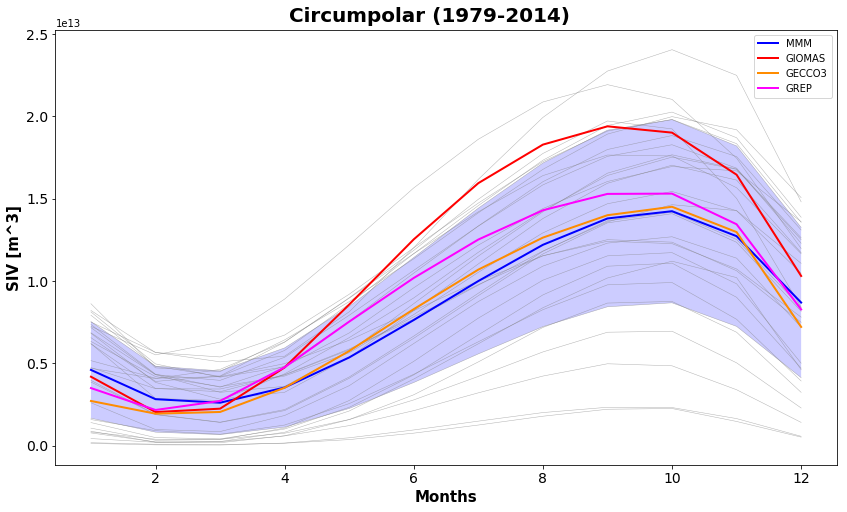

In [30]:
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))

fig.suptitle("Circumpolar (1979-2014) ", fontweight ='bold',fontsize=20, y=0.92)

Mod_RN_ACycle_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

Mod_RN_ACycle_list.plot(x="Time", y=["MMM", "GIOMAS","GECCO3","GREP"],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"darkorange","magenta"],ax=ax)

ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['MMM+STD'], Mod_RN_ACycle_list['MMM-STD'],
               facecolor ='blue',alpha=0.2)
# ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['Obs+STD'], Mod_RN_ACycle_list['Obs-STD'],
#                facecolor ='red',alpha=0.2)

#plt.legend(['Models','Observation'])
plt.ylabel('SIV [m^3]',fontsize=15,fontweight ='bold')
plt.xlabel('Months',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.savefig('SIV_Rean-MMM_AnnualCycle_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Volumes comparision with the satellite data: (2002-2014) 

In [50]:
# function for calculating the volumes: 

def Mod_Vols_EC2(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('2002-06-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('2002-06-01','2015-01-01'))*Area).groupby('time.month').mean(dim='time'))/100).sum(dim=('ni','nj'),skipna=True)
    return(Volume)

In [51]:
# Dataframe for SIT Averages:

# excluded are the models with extreme values:

Mod_EC2_ACycle_list = pd.DataFrame(
    {'Time': EV_CS.month,
     ds_sic_1.attrs['source_id']: Mod_Vols_EC2(ds_sic_1,ds_sit_1,wgt_gc_models),
     ds_sic_2.attrs['source_id']: Mod_Vols_EC2(ds_sic_2,ds_sit_2,wgt_gc_models),
     ds_sic_3.attrs['source_id']: Mod_Vols_EC2(ds_sic_3,ds_sit_3,wgt_gc_models),
     ds_sic_4.attrs['source_id']: Mod_Vols_EC2(ds_sic_4,ds_sit_4,wgt_gc_models),
     ds_sic_5.attrs['source_id']: Mod_Vols_EC2(ds_sic_5,ds_sit_5,wgt_gc_models),
     ds_sic_6.attrs['source_id']: Mod_Vols_EC2(ds_sic_6,ds_sit_6,wgt_gc_models),
     ds_sic_7.attrs['source_id']: Mod_Vols_EC2(ds_sic_7,ds_sit_7,wgt_gc_models),
     ds_sic_8.attrs['source_id']: Mod_Vols_EC2(ds_sic_8,ds_sit_8,wgt_gc_models),
     ds_sic_9.attrs['source_id']: Mod_Vols_EC2(ds_sic_9,ds_sit_9,wgt_gc_models),
     ds_sic_10.attrs['source_id']: Mod_Vols_EC2(ds_sic_10,ds_sit_10,wgt_gc_models),
     ds_sic_11.attrs['source_id']: Mod_Vols_EC2(ds_sic_11,ds_sit_11,wgt_gc_models),
     ds_sic_12.attrs['source_id']: Mod_Vols_EC2(ds_sic_12,ds_sit_12,wgt_gc_models),
#      ds_sic_13.attrs['source_id']: Mod_Vols_EC2(ds_sic_13,ds_sit_13,wgt_gc_models),
     ds_sic_14.attrs['source_id']: Mod_Vols_EC2(ds_sic_14,ds_sit_14,wgt_gc_models),
#      ds_sic_15.attrs['source_id']: Mod_Vols_EC2(ds_sic_15,ds_sit_15,wgt_gc_models),
#      ds_sic_16.attrs['source_id']: Mod_Vols_EC2(ds_sic_16,ds_sit_16,wgt_gc_models),
#      ds_sic_17.attrs['source_id']: Mod_Vols_EC2(ds_sic_17,ds_sit_17,wgt_gc_models),
#      ds_sic_18.attrs['source_id']: Mod_Vols_EC2(ds_sic_18,ds_sit_18,wgt_gc_models),
#      ds_sic_19.attrs['source_id']: Mod_Vols_EC2(ds_sic_19,ds_sit_19,wgt_gc_models),
     ds_sic_20.attrs['source_id']: Mod_Vols_EC2(ds_sic_20,ds_sit_20,wgt_gc_models),
     ds_sic_21.attrs['source_id']: Mod_Vols_EC2(ds_sic_21,ds_sit_21,wgt_gc_models),
     ds_sic_22.attrs['source_id']: Mod_Vols_EC2(ds_sic_22,ds_sit_22,wgt_gc_models),
     ds_sic_23.attrs['source_id']: Mod_Vols_EC2(ds_sic_23,ds_sit_23,wgt_gc_models),
     ds_sic_24.attrs['source_id']: Mod_Vols_EC2(ds_sic_24,ds_sit_24,wgt_gc_models),
     ds_sic_25.attrs['source_id']: Mod_Vols_EC2(ds_sic_25,ds_sit_25,wgt_gc_models),
     ds_sic_26.attrs['source_id']: Mod_Vols_EC2(ds_sic_26,ds_sit_26,wgt_gc_models),
     ds_sic_27.attrs['source_id']: Mod_Vols_EC2(ds_sic_27,ds_sit_27,wgt_gc_models),
     ds_sic_28.attrs['source_id']: Mod_Vols_EC2(ds_sic_28,ds_sit_28,wgt_gc_models),
     ds_sic_29.attrs['source_id']: Mod_Vols_EC2(ds_sic_29,ds_sit_29,wgt_gc_models),
     ds_sic_30.attrs['source_id']: Mod_Vols_EC2(ds_sic_30,ds_sit_30,wgt_gc_models),
     ds_sic_31.attrs['source_id']: Mod_Vols_EC2(ds_sic_31,ds_sit_31,wgt_gc_models),
     ds_sic_32.attrs['source_id']: Mod_Vols_EC2(ds_sic_32,ds_sit_32,wgt_gc_models),
     ds_sic_33.attrs['source_id']: Mod_Vols_EC2(ds_sic_33,ds_sit_33,wgt_gc_models),
     ds_sic_34.attrs['source_id']: Mod_Vols_EC2(ds_sic_34,ds_sit_34,wgt_gc_models),
     ds_sic_35.attrs['source_id']: Mod_Vols_EC2(ds_sic_35,ds_sit_35,wgt_gc_models),
     'EV-CS2': EV_CS,
                                  })                                                            

In [52]:
Mod_EC2_ACycle_list['MMM'] = Mod_EC2_ACycle_list.iloc[:, 1:30].mean(axis=1)
Mod_EC2_ACycle_list

Time    ACCESS-CM2  ACCESS-ESM1-5     CESM2-FV2  CESM2-WACCM-FV2  \
0      1  2.504399e+12   6.059682e+12  6.571788e+12     7.602006e+12   
1      2  8.979612e+11   4.040843e+12  4.108155e+12     5.199202e+12   
2      3  8.217568e+11   3.404066e+12  3.754904e+12     4.978055e+12   
3      4  1.751273e+12   3.886843e+12  5.084575e+12     6.208292e+12   
4      5  3.566745e+12   5.235860e+12  7.535204e+12     8.486593e+12   
5      6  6.189616e+12   7.393095e+12  1.024140e+13     1.124050e+13   
6      7  8.585866e+12   9.807880e+12  1.288038e+13     1.386856e+13   
7      8  1.067439e+13   1.218137e+13  1.539140e+13     1.630646e+13   
8      9  1.198790e+13   1.394660e+13  1.708388e+13     1.811846e+13   
9     10  1.231154e+13   1.478332e+13  1.780815e+13     1.874032e+13   
10    11  1.107357e+13   1.372072e+13  1.637570e+13     1.729046e+13   
11    12  7.018718e+12   9.964685e+12  1.189976e+13     1.268981e+13   

     CESM2-WACCM         CESM2  CMCC-CM2-SR5     CMCC-ESM2    CNRM-CM6-1  ...  \
0   6.827891e+12  6.849793e+12  3.692957e+12  3.487098e+12  1.083193e+12  ...   
1   3.972250e+12  3.854461e+12  1.895487e+12  1.616219e+12  3.182913e+11  ...   
2   3.478243e+12  3.066220e+12  1.446046e+12  1.167263e+12  2.674342e+11  ...   
3   4.967283e+12  4.381801e+12  2.051672e+12  1.849415e+12  8.196346e+11  ...   
4   7.639099e+12  7.090635e+12  3.830873e+12  3.728953e+12  2.089672e+12  ...   
5   1.049190e+13  1.000670e+13  6.180050e+12  6.101116e+12  3.976612e+12  ...   
6   1.335882e+13  1.277697e+13  8.608833e+12  8.561116e+12  6.366341e+12  ...   
7   1.605064e+13  1.538061e+13  1.091410e+13  1.097956e+13  8.777643e+12  ...   
8   1.812411e+13  1.735532e+13  1.273031e+13  1.280311e+13  1.045581e+13  ...   
9   1.884569e+13  1.835903e+13  1.319643e+13  1.332517e+13  1.059989e+13  ...   
10  1.729056e+13  1.716150e+13  1.152912e+13  1.167835e+13  8.538095e+12  ...   
11  1.260723e+13  1.270716e+13  7.620788e+12  7.687941e+12  4.292064e+12  ...   

    MPI-ESM1-2-HR  MPI-ESM1-2-LR    MRI-ESM2-0         NESM3       NorCPM1  \
0    1.470716e+12   7.074363e+11  7.692577e+12  6.498940e+11  6.812981e+12   
1    9.847694e+11   3.072246e+11  4.579530e+12  1.359613e+11  5.114026e+12   
2    7.448809e+11   3.090245e+11  3.834208e+12  1.701434e+11  5.901400e+12   
3    1.196107e+12   6.539571e+11  4.424547e+12  6.523418e+11  8.523119e+12   
4    2.540268e+12   1.469216e+12  6.481808e+12  1.891639e+12  1.167645e+13   
5    4.181422e+12   2.713766e+12  9.201644e+12  3.762984e+12  1.505958e+13   
6    6.090415e+12   4.202711e+12  1.165420e+13  5.793721e+12  1.798671e+13   
7    7.945852e+12   5.742581e+12  1.376123e+13  7.880283e+12  2.020197e+13   
8    9.262326e+12   6.932765e+12  1.533504e+13  9.578691e+12  2.142959e+13   
9    9.451521e+12   7.056856e+12  1.617419e+13  1.056743e+13  2.072702e+13   
10   7.358221e+12   5.090368e+12  1.586371e+13  9.536803e+12  1.707863e+13   
11   3.701495e+12   2.238314e+12  1.294741e+13  4.096910e+12  1.153587e+13   

      NorESM2-LM    NorESM2-MM   UKESM1-0-LL        EV-CS2           MMM  
0   4.839311e+12  4.335153e+12  7.913408e+12  1.007585e+13  4.084149e+12  
1   3.812048e+12  3.055693e+12  4.244982e+12  6.956538e+12  2.435707e+12  
2   3.879705e+12  3.002425e+12  3.985281e+12  8.408195e+12  2.246509e+12  
3   4.645802e+12  3.790160e+12  5.673483e+12  1.337449e+13  3.099659e+12  
4   6.023612e+12  5.342950e+12  7.997235e+12  1.938644e+13  4.846374e+12  
5   7.820355e+12  7.420308e+12  1.047313e+13  2.554638e+13  7.059945e+12  
6   9.637017e+12  9.432247e+12  1.307732e+13  3.097302e+13  9.323689e+12  
7   1.119423e+13  1.127488e+13  1.573904e+13  3.368525e+13  1.146004e+13  
8   1.204140e+13  1.226310e+13  1.789470e+13  3.393602e+13  1.300393e+13  
9   1.191100e+13  1.209057e+13  1.890930e+13  3.075699e+13  1.344302e+13  
10  1.040420e+13  1.031842e+13  1.809299e+13  2.473917e+13  1.195228e+13  
11  7.458825e+12  7.164764e+12  1.406051e+13  1.805704e+13  8.044947e+12  

[12 rows x 32 columns]

In [53]:
Mod_EC2_ACycle_list['MMM+STD'] = Mod_EC2_ACycle_list['MMM'] + Mod_EC2_ACycle_list.iloc[:, 1:30].std(axis=1)
Mod_EC2_ACycle_list['MMM-STD'] = Mod_EC2_ACycle_list['MMM'] - Mod_EC2_ACycle_list.iloc[:, 1:30].std(axis=1)

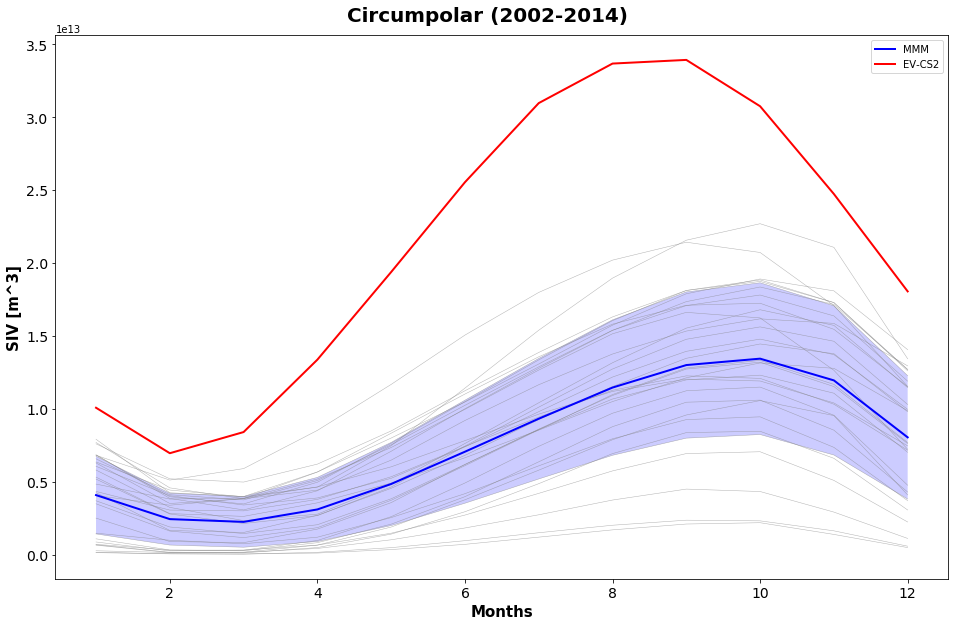

In [54]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

fig.suptitle("Circumpolar (2002-2014)", fontweight ='bold',fontsize=20, y=0.92)


Mod_EC2_ACycle_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)


Mod_EC2_ACycle_list.plot(x="Time", y=["MMM", "EV-CS2"],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red'],ax=ax)

ax.fill_between(Mod_EC2_ACycle_list["Time"],Mod_EC2_ACycle_list['MMM+STD'], Mod_EC2_ACycle_list['MMM-STD'],
               facecolor ='blue',alpha=0.2)
# ax.fill_between(Mod_EC2_ACycle_list["Time"],Mod_EC2_ACycle_list['Obs+STD'], Mod_EC2_ACycle_list['Obs-STD'],
#                facecolor ='red',alpha=0.2)

#plt.legend(['Models','Observation'])
plt.ylabel('SIV [m^3]',fontsize=15,fontweight ='bold')
plt.xlabel('Months',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.savefig('SIV_EV-CS2-MMM_AnnualCycle_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [55]:
df_All = pd.DataFrame(
    {'Time': GIOMAS.month,
     "MMM":Mod_RN_ACycle_list['MMM'],
     "GIOMAS":Mod_RN_ACycle_list['GIOMAS'],
     "GECCO3":Mod_RN_ACycle_list['GECCO3'],
     "GREP":Mod_RN_ACycle_list['GREP'],
     "EV-CS2":Mod_EC2_ACycle_list['EV-CS2']
          })

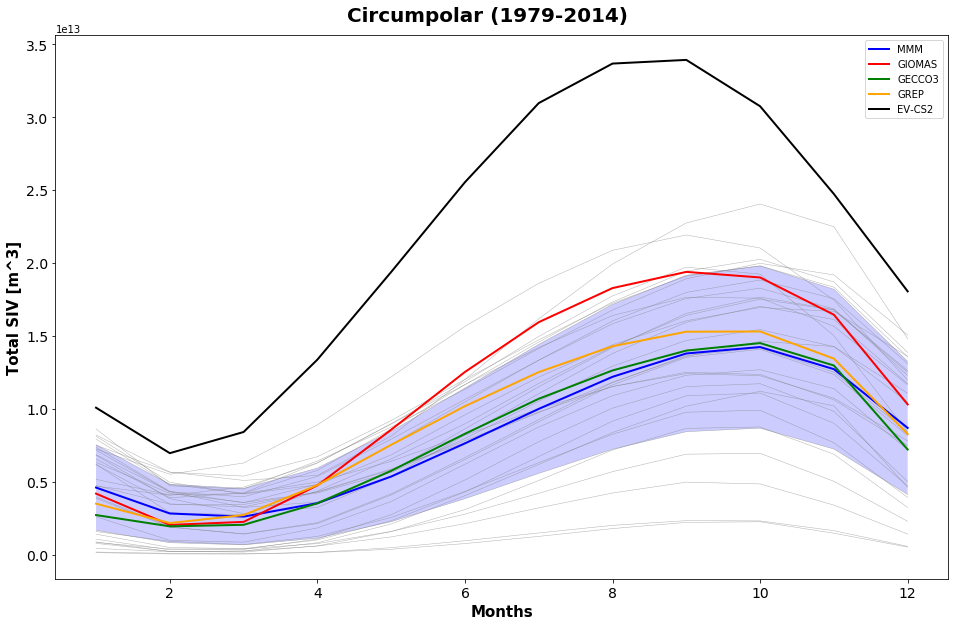

In [56]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

fig.suptitle("Circumpolar (1979-2014)", fontweight ='bold',fontsize=20, y=0.92)


Mod_RN_ACycle_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

df_All.plot(x="Time", kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"green","orange","black"],ax=ax)

# Mod_EC2_ACycle_list.plot(x="Time", y=["EV-CS2"],
#                      kind="line",alpha=1.0,linewidth=2,
#                      color=['black'],ax=ax)

ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['MMM+STD'], Mod_RN_ACycle_list['MMM-STD'],
               facecolor ='blue',alpha=0.2)
# ax.fill_between(Mod_RN_ACycle_list["Time"],Mod_RN_ACycle_list['Obs+STD'], Mod_RN_ACycle_list['Obs-STD'],
#                facecolor ='red',alpha=0.2)

#plt.legend(['Models','Observation'])
ax.set_ylabel('Total SIV [m^3]',fontsize=15,fontweight ='bold')
ax.set_xlabel('Months',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.savefig('TotalSIV_Obs-MMM_AnnualCycle_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

### Dataframe for anomalies:

In [39]:
# Dataframe for SIV Anomalies:

# excluded are the models with extreme values:

Mod_Anom_list = pd.DataFrame(
    {'Time': GIOMAS_SIT.time,
     ds_sic_1.attrs['source_id']: Mod_Vols(ds_sic_1,ds_sit_1,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_2.attrs['source_id']: Mod_Vols(ds_sic_2,ds_sit_2,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_3.attrs['source_id']: Mod_Vols(ds_sic_3,ds_sit_3,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_4.attrs['source_id']: Mod_Vols(ds_sic_4,ds_sit_4,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_5.attrs['source_id']: Mod_Vols(ds_sic_5,ds_sit_5,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_6.attrs['source_id']: Mod_Vols(ds_sic_6,ds_sit_6,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_7.attrs['source_id']: Mod_Vols(ds_sic_7,ds_sit_7,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_8.attrs['source_id']: Mod_Vols(ds_sic_8,ds_sit_8,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_9.attrs['source_id']: Mod_Vols(ds_sic_9,ds_sit_9,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_10.attrs['source_id']: Mod_Vols(ds_sic_10,ds_sit_10,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_11.attrs['source_id']: Mod_Vols(ds_sic_11,ds_sit_11,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_12.attrs['source_id']: Mod_Vols(ds_sic_12,ds_sit_12,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_13.attrs['source_id']: Mod_Vols(ds_sic_13,ds_sit_13,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_14.attrs['source_id']: Mod_Vols(ds_sic_14,ds_sit_14,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_15.attrs['source_id']: Mod_Vols(ds_sic_15,ds_sit_15,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_16.attrs['source_id']: Mod_Vols(ds_sic_16,ds_sit_16,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_17.attrs['source_id']: Mod_Vols(ds_sic_17,ds_sit_17,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_18.attrs['source_id']: Mod_Vols(ds_sic_18,ds_sit_18,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
#      ds_sic_19.attrs['source_id']: Mod_Vols(ds_sic_19,ds_sit_19,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_20.attrs['source_id']: Mod_Vols(ds_sic_20,ds_sit_20,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_21.attrs['source_id']: Mod_Vols(ds_sic_21,ds_sit_21,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_22.attrs['source_id']: Mod_Vols(ds_sic_22,ds_sit_22,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_23.attrs['source_id']: Mod_Vols(ds_sic_23,ds_sit_23,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_24.attrs['source_id']: Mod_Vols(ds_sic_24,ds_sit_24,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_25.attrs['source_id']: Mod_Vols(ds_sic_25,ds_sit_25,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_26.attrs['source_id']: Mod_Vols(ds_sic_26,ds_sit_26,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_27.attrs['source_id']: Mod_Vols(ds_sic_27,ds_sit_27,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_28.attrs['source_id']: Mod_Vols(ds_sic_28,ds_sit_28,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_29.attrs['source_id']: Mod_Vols(ds_sic_29,ds_sit_29,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_30.attrs['source_id']: Mod_Vols(ds_sic_30,ds_sit_30,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_31.attrs['source_id']: Mod_Vols(ds_sic_31,ds_sit_31,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_32.attrs['source_id']: Mod_Vols(ds_sic_32,ds_sit_32,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_33.attrs['source_id']: Mod_Vols(ds_sic_33,ds_sit_33,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_34.attrs['source_id']: Mod_Vols(ds_sic_34,ds_sit_34,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     ds_sic_35.attrs['source_id']: Mod_Vols(ds_sic_35,ds_sit_35,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     'GIOMAS': RN_Vols(GIOMAS_SIT,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
     'GECCO3': RN_Vols(GECCO_SIT,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
                                  })                                                            

In [40]:
Mod_Anom_list['Time'] = pd.to_datetime(Mod_Anom_list['Time'])
Mod_Anom_list = Mod_Anom_list.set_index('Time')

In [74]:
# To accomodate different time-series of varying lengths:

df_anom = pd.DataFrame(
    {'Time': GIOMAS_SIT.time.sel(time=slice('1993-01-01','2015-01-01')),
     'GREP'  : RN_Vols(GREP_SIT,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
                                  })
df_anom1 = pd.DataFrame(
    {'Time': sit_Obs_Regridded.time,
     'ENV-CS2'  : RN_Vols(sit_Obs_Regridded,wgt_gc_models)[2].mean(dim=('ni','nj'),skipna=True),
                                  })   

In [75]:
df_anom['Time'] = pd.to_datetime(df_anom['Time'])
df_anom = df_anom.set_index('Time')

In [76]:
df_anom1['Time'] = pd.to_datetime(df_anom1['Time'])
df_anom1 = df_anom1.set_index('Time')

In [77]:
df2 = pd.concat([df_anom, df_anom1, Mod_Anom_list], axis=1)

In [78]:
Mod_Anom_list['ENV-CS2'] = df2.iloc[:,1]
Mod_Anom_list['GREP'] = df2.iloc[:,0]

In [79]:
Mod_Anom_list['MMM'] = Mod_Anom_list.iloc[:, 0:29].mean(axis=1)
Mod_Anom_list['Time'] = GIOMAS_SIT.time

In [80]:
Mod_Anom_list

ACCESS-CM2  ACCESS-ESM1-5    CESM2-FV2  CESM2-WACCM-FV2  \
Time                                                                    
1979-01-01 -1.920651e+05     11775818.0  -17502678.0      300634592.0   
1979-02-01 -6.754902e+07     34794900.0  -29559590.0      291722208.0   
1979-03-01 -2.182495e+08    102848912.0  -17803640.0      301228448.0   
1979-04-01 -1.565375e+08     83644392.0  -35645036.0      286993056.0   
1979-05-01 -1.013658e+08     37853440.0    8952929.0      238783760.0   
...                  ...            ...          ...              ...   
2014-08-01 -1.290637e+08     18335928.0 -204508528.0     -203900992.0   
2014-09-01 -1.642993e+08     41781528.0 -162474544.0     -213184400.0   
2014-10-01 -1.620095e+08     41198544.0 -137148960.0     -251181056.0   
2014-11-01 -1.259540e+08     49253232.0 -106129128.0     -209183936.0   
2014-12-01 -4.307004e+07    -18234940.0 -113960048.0     -207291328.0   

            CESM2-WACCM        CESM2  CMCC-CM2-SR5    CMCC-ESM2   CNRM-CM6-1  \
Time                                                                           
1979-01-01    4848432.0  342166240.0   113990816.0   91496056.0  151842896.0   
1979-02-01  -22928540.0  389535424.0   102058472.0  106160960.0   83251848.0   
1979-03-01   -5067795.0  467283520.0   112782200.0  191659328.0   82301488.0   
1979-04-01   69407776.0  428922432.0   148827824.0  297375776.0   44085676.0   
1979-05-01  163498448.0  346653536.0   132187024.0  285414016.0   16362146.0   
...                 ...          ...           ...          ...          ...   
2014-08-01 -217221024.0 -114384272.0  -194092144.0 -184382400.0  -53014244.0   
2014-09-01 -191462240.0  -59924892.0  -234064128.0 -176553040.0  -82344264.0   
2014-10-01 -162797008.0  -81007776.0  -273565120.0 -177045904.0  -73912408.0   
2014-11-01 -153499792.0 -134002432.0  -264056128.0 -193062720.0  -71974208.0   
2014-12-01 -133039144.0 -116224976.0  -155176000.0 -178661360.0 -112024096.0   

             CNRM-ESM2-1  ...      NorCPM1   NorESM2-LM   NorESM2-MM  \
Time                      ...                                          
1979-01-01  2.889282e+06  ...  119635112.0   82224504.0  21897606.00   
1979-02-01  7.152471e+03  ...  132729888.0  117135984.0   2262719.50   
1979-03-01  2.057088e+07  ...  135365248.0  160324320.0 -44140476.00   
1979-04-01  1.158149e+08  ...  112994616.0  186845696.0 -35670540.00   
1979-05-01  6.234315e+07  ...  111320040.0  180841376.0   3328759.75   
...                  ...  ...          ...          ...          ...   
2014-08-01  2.915289e+07  ... -162824928.0 -125848896.0 -24405986.00   
2014-09-01 -5.986912e+06  ... -181708912.0 -163842960.0  -1259010.75   
2014-10-01  5.876338e+05  ... -134982464.0  -97155368.0  -7977198.00   
2014-11-01  7.601826e+06  ...  -89108152.0  -75695464.0 -31844922.00   
2014-12-01  4.756493e+07  ...  -74192624.0  -41524888.0 -97702064.00   

            UKESM1-0-LL       GIOMAS       GECCO3      ENV-CS2         GREP  \
Time                                                                          
1979-01-01  342734048.0   38718828.0 -147348560.0          NaN          NaN   
1979-02-01  342784800.0   27519254.0 -249650016.0          NaN          NaN   
1979-03-01  390286560.0   13808157.0 -253900400.0          NaN          NaN   
1979-04-01  411572672.0   24228456.0 -130292560.0          NaN          NaN   
1979-05-01  365684768.0   58739736.0  -33412198.0          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2014-08-01 -172288960.0  205089984.0   57908232.0  285229184.0  133574640.0   
2014-09-01 -163396752.0  242784608.0   67328152.0  441015296.0  165947968.0   
2014-10-01 -132511232.0  208943872.0  -14527825.0  671267392.0  155664096.0   
2014-11-01 -172735024.0  192263824.0 -138496304.0  482218080.0  153819440.0   
2014-12-01 -284358976.0  229177728.0  -65254736.0  489603936.0  196813200.0   

                    MMM       Time  
Time                 

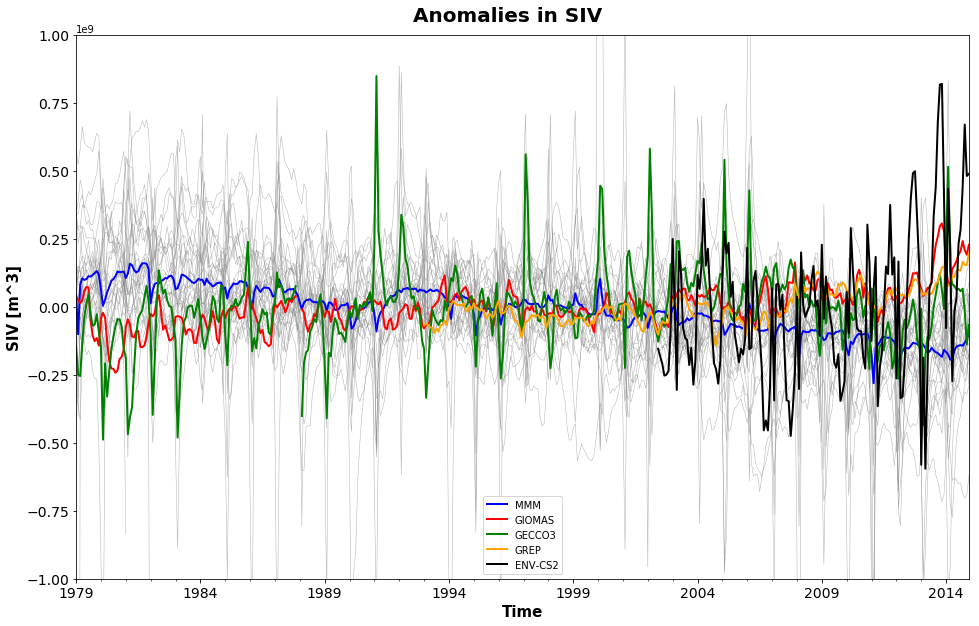

In [82]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

ax.set_ylim(-1*10**9,1*10**9)

fig.suptitle("Anomalies in SIV", fontweight ='bold',fontsize=20, y=0.92)

Mod_Anom_list.plot(x="Time",kind="line",alpha=0.6,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

Mod_Anom_list.plot(x="Time", y=["MMM", "GIOMAS","GECCO3",'GREP','ENV-CS2'],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"green","orange","black"],ax=ax)

#plt.legend(['Models','Observation'])
ax.set_ylabel('SIV [m^3]',fontsize=15,fontweight ='bold')
ax.set_xlabel('Time',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.savefig('SIV_Obs-MMM_Anom_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [83]:
def RN_SIT_Anom(sit):
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [84]:
def clim_anom(data):
    sit = data.sithick.sel(time=slice('1979-01-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

In [88]:
# Dataframe for SIT Anomalies:

Mod_SIT_Anom_list = pd.DataFrame(
    {'Time': GIOMAS_SIT.time,
     ds_sic_1.attrs['source_id']: clim_anom(ds_sit_1)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_2.attrs['source_id']: clim_anom(ds_sit_2)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_3.attrs['source_id']: clim_anom(ds_sit_3)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_4.attrs['source_id']: clim_anom(ds_sit_4)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_5.attrs['source_id']: clim_anom(ds_sit_5)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_6.attrs['source_id']: clim_anom(ds_sit_6)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_7.attrs['source_id']: clim_anom(ds_sit_7)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_8.attrs['source_id']: clim_anom(ds_sit_8)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_9.attrs['source_id']: clim_anom(ds_sit_9)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_10.attrs['source_id']: clim_anom(ds_sit_10)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_11.attrs['source_id']: clim_anom(ds_sit_11)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_12.attrs['source_id']: clim_anom(ds_sit_12)[1].sum(dim=('ni','nj'),skipna=True),
#      ds_sic_13.attrs['source_id']: clim_anom(ds_sit_13)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_14.attrs['source_id']: clim_anom(ds_sit_14)[1].sum(dim=('ni','nj'),skipna=True),
#      ds_sic_15.attrs['source_id']: clim_anom(ds_sit_15)[1].sum(dim=('ni','nj'),skipna=True),
#      ds_sic_16.attrs['source_id']: clim_anom(ds_sit_16)[1].sum(dim=('ni','nj'),skipna=True),
#      ds_sic_17.attrs['source_id']: clim_anom(ds_sit_17)[1].sum(dim=('ni','nj'),skipna=True),
#      ds_sic_18.attrs['source_id']: clim_anom(ds_sit_18)[1].sum(dim=('ni','nj'),skipna=True),
#      ds_sic_19.attrs['source_id']: clim_anom(ds_sit_19)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_20.attrs['source_id']: clim_anom(ds_sit_20)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_21.attrs['source_id']: clim_anom(ds_sit_21)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_22.attrs['source_id']: clim_anom(ds_sit_22)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_23.attrs['source_id']: clim_anom(ds_sit_23)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_24.attrs['source_id']: clim_anom(ds_sit_24)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_25.attrs['source_id']: clim_anom(ds_sit_25)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_26.attrs['source_id']: clim_anom(ds_sit_26)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_27.attrs['source_id']: clim_anom(ds_sit_27)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_28.attrs['source_id']: clim_anom(ds_sit_28)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_29.attrs['source_id']: clim_anom(ds_sit_29)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_30.attrs['source_id']: clim_anom(ds_sit_30)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_31.attrs['source_id']: clim_anom(ds_sit_31)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_32.attrs['source_id']: clim_anom(ds_sit_32)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_33.attrs['source_id']: clim_anom(ds_sit_33)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_34.attrs['source_id']: clim_anom(ds_sit_34)[1].sum(dim=('ni','nj'),skipna=True),
     ds_sic_35.attrs['source_id']: clim_anom(ds_sit_35)[1].sum(dim=('ni','nj'),skipna=True),
     'GIOMAS': RN_SIT_Anom(GIOMAS_SIT)[1].sum(dim=('ni','nj'),skipna=True),
     'GECCO3': RN_SIT_Anom(GECCO_SIT)[1].sum(dim=('ni','nj'),skipna=True),
                                  })                                                            

In [89]:
Mod_SIT_Anom_list['Time'] = pd.to_datetime(Mod_SIT_Anom_list['Time'])
Mod_SIT_Anom_list = Mod_SIT_Anom_list.set_index('Time')

In [90]:
Mod_SIT_Anom_list['MMM'] = Mod_SIT_Anom_list.iloc[:, 0:29].mean(axis=1)

In [91]:
# To accomodate different time-series of varying lengths:

df_SIT_anom = pd.DataFrame(
    {'Time': GIOMAS_SIT.time.sel(time=slice('1993-01-01','2015-01-01')),
     'GREP': RN_SIT_Anom(GREP_SIT)[1].sum(dim=('ni','nj'),skipna=True),
                                  })
df_SIT_anom1 = pd.DataFrame(
    {'Time': sit_Obs_Regridded.time,
     'ENV-CS2'  : RN_SIT_Anom(sit_Obs_Regridded)[1].sum(dim=('ni','nj'),skipna=True),
                                  })   

In [95]:
df_SIT_anom['Time'] = pd.to_datetime(df_SIT_anom['Time'])
df_SIT_anom = df_SIT_anom.set_index('Time')

In [96]:
df_SIT_anom1['Time'] = pd.to_datetime(df_SIT_anom1['Time'])
df_SIT_anom1 = df_SIT_anom1.set_index('Time')

In [97]:
df3 = pd.concat([df_SIT_anom, df_SIT_anom1, Mod_SIT_Anom_list], axis=1)

In [98]:
Mod_SIT_Anom_list['ENV-CS2'] = df3['ENV-CS2']
Mod_SIT_Anom_list['GREP'] = df3['GREP']

In [99]:
# Mod_SIT_Anom_list['MMM'] = Mod_SIT_Anom_list.iloc[:, 0:30].mean(axis=1)
Mod_SIT_Anom_list['Time'] = GIOMAS_SIT.time

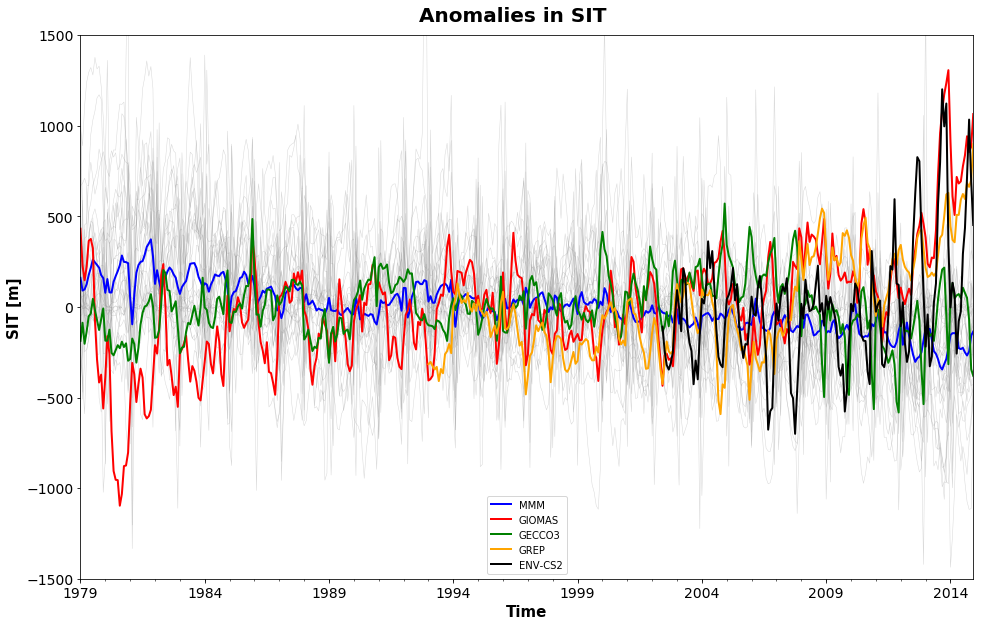

In [104]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,10))

ax.set_ylim(-1500,1500)

fig.suptitle("Anomalies in SIT", fontweight ='bold',fontsize=20, y=0.92)

Mod_SIT_Anom_list.plot(x="Time",kind="line",alpha=0.3,linewidth=0.5,
                         color=['grey'],legend=False,ax=ax)

Mod_SIT_Anom_list.plot(x="Time", y=["MMM", "GIOMAS","GECCO3",'GREP','ENV-CS2'],
                     kind="line",alpha=1.0,linewidth=2,
                     color=['blue','red',"green","orange","black"],ax=ax)

#plt.legend(['Models','Observation'])
ax.set_ylabel('SIT [m]',fontsize=15,fontweight ='bold')
ax.set_xlabel('Time',fontsize=15,fontweight ='bold')

ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# plt.savefig('SIT_Obs-MMM_Anomaly_Circumpolar.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [105]:
def Bivariate_Dist(SIT,SIC,month,ax):    
    y = SIT.sel(time=SIT.time.dt.month.isin([month])).mean(dim='time') #SIT
    x = SIC.sel(time=SIC.time.dt.month.isin([month])).mean(dim='time') #SIC  
    valid = (x.values.ravel()>=0) & (y.values.ravel()>=0)
    x_valid = x.values.ravel()[valid]
    y_valid = y.values.ravel()[valid]
    BD = sns.kdeplot(x = x_valid, y = y_valid,ax=ax)
    plt.xlabel("SIC",fontsize=15)
    plt.ylabel("SIT",fontsize=15)
    plt.title(month)
    return(BD)

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


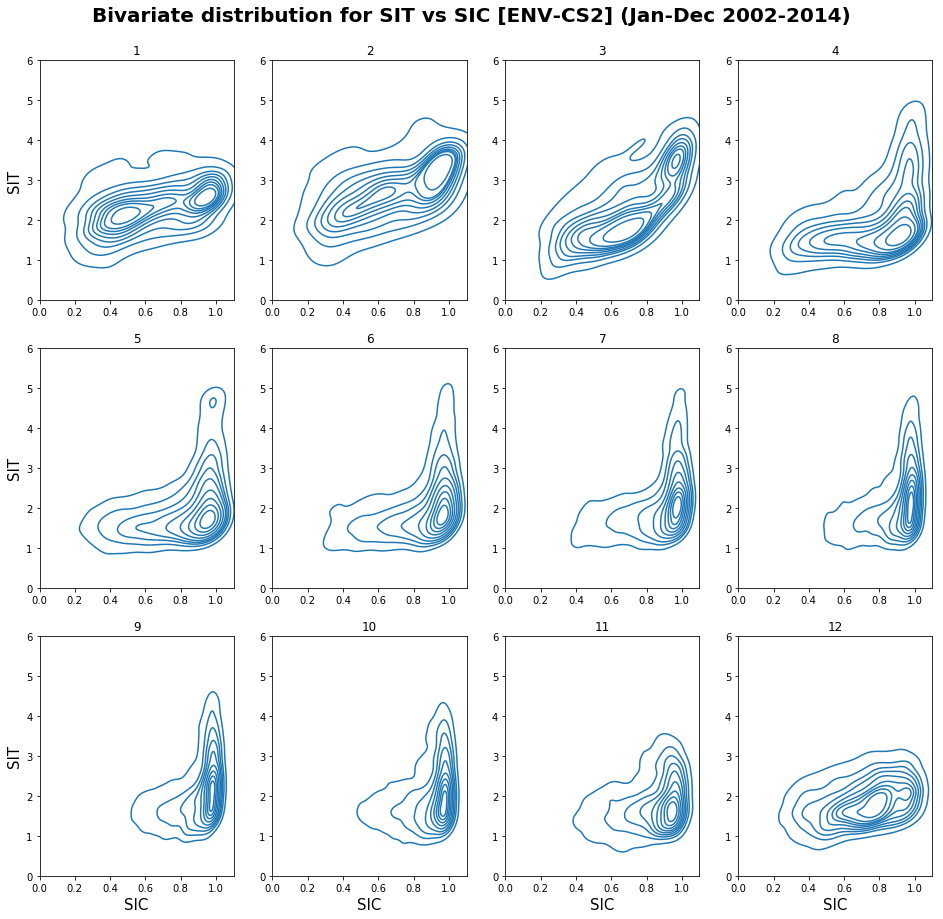

In [107]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(sit_Obs_Regridded,SIC_Obs_Regridded,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 6))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC [ENV-CS2] (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


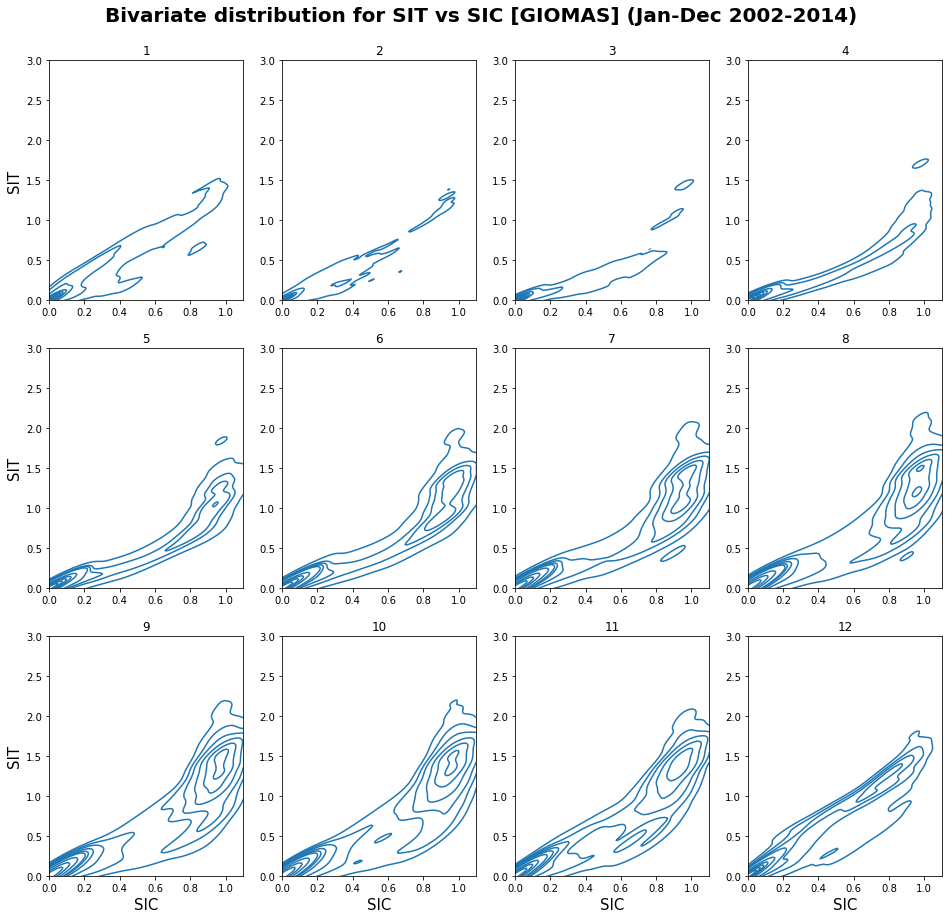

In [108]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(GIOMAS_SIT,SIC_Reanan,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 3))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC [GIOMAS] (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
# plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


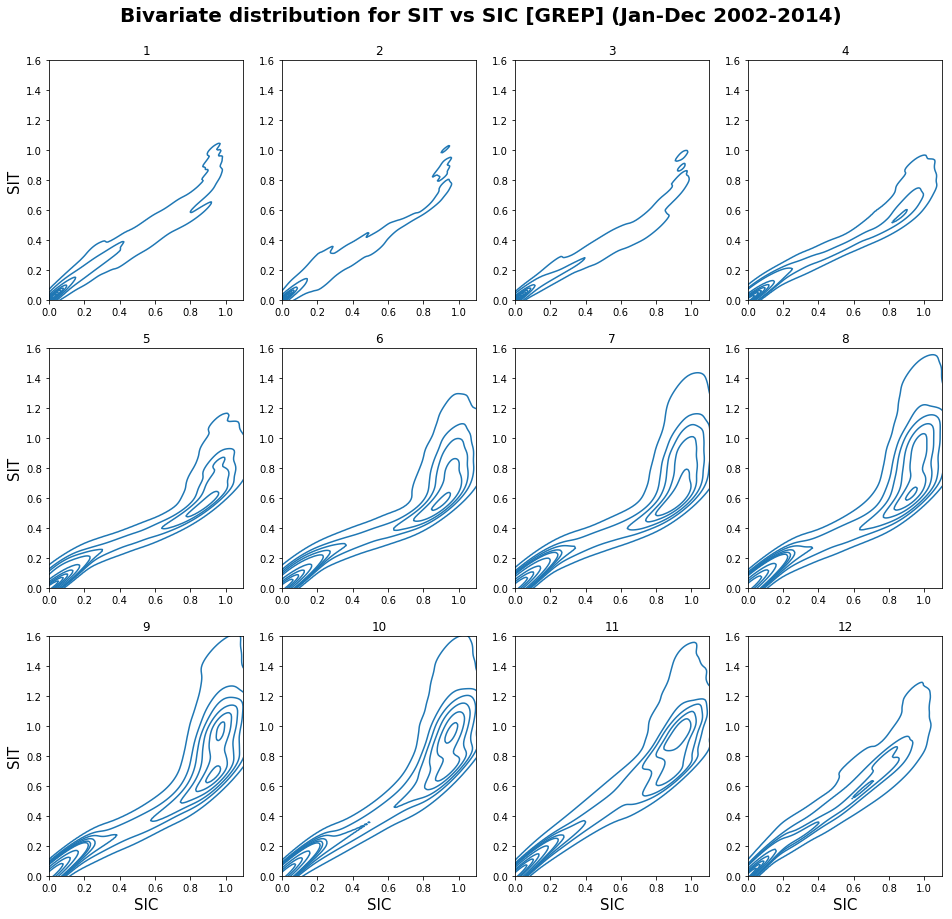

In [109]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(GREP_SIT,SIC_Reanan1,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 1.6))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC [GREP] (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
# plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


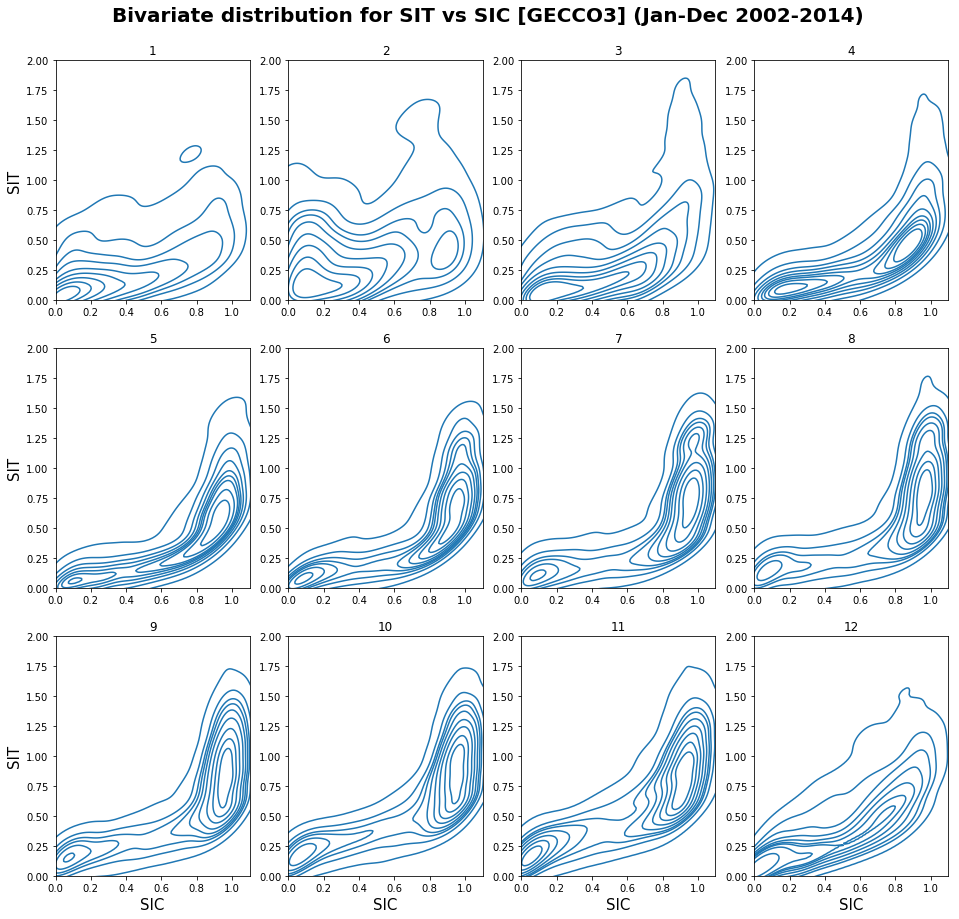

In [110]:
fig = plt.figure(figsize=[16,15])

for i in range(1, 13):
    ax = plt.subplot(3, 4, i)
    this = Bivariate_Dist(GECCO_SIT,SIC_Reanan,i,ax)
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 2))
    this.set(xlim=(0, 1.1))
    

ax = plt.subplot(3, 4, 1)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 5)
ax.set_ylabel("SIT")
ax.set_xlabel("")

ax = plt.subplot(3, 4, 9)
ax.set_ylabel("SIT")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 10)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 11)
ax.set_ylabel("")
ax.set_xlabel("SIC")

ax = plt.subplot(3, 4, 12)
ax.set_ylabel("")
ax.set_xlabel("SIC")

fig.suptitle("Bivariate distribution for SIT vs SIC [GECCO3] (Jan-Dec 2002-2014)", fontweight ='bold',fontsize=20,y=0.93)
# plt.savefig('displot_KDE_Gridcell_All.pdf',dpi=300, bbox_inches='tight')

plt.show()

## Scatter plot for clusters:

In [111]:
import plotly.express as px

In [112]:
# Sep-Feb:
diff_Sep_Feb = Mod_RN_ACycle_list[1:].diff(periods=7,axis=0)[8:9].iloc[:,1:30]

In [113]:
Cluster_DF = pd.DataFrame(diff_Sep_Feb.values.transpose(),columns = ['Sep_Feb'])
Cluster_DF.insert(0,'Models', Mod_RN_ACycle_list.columns[1:30])

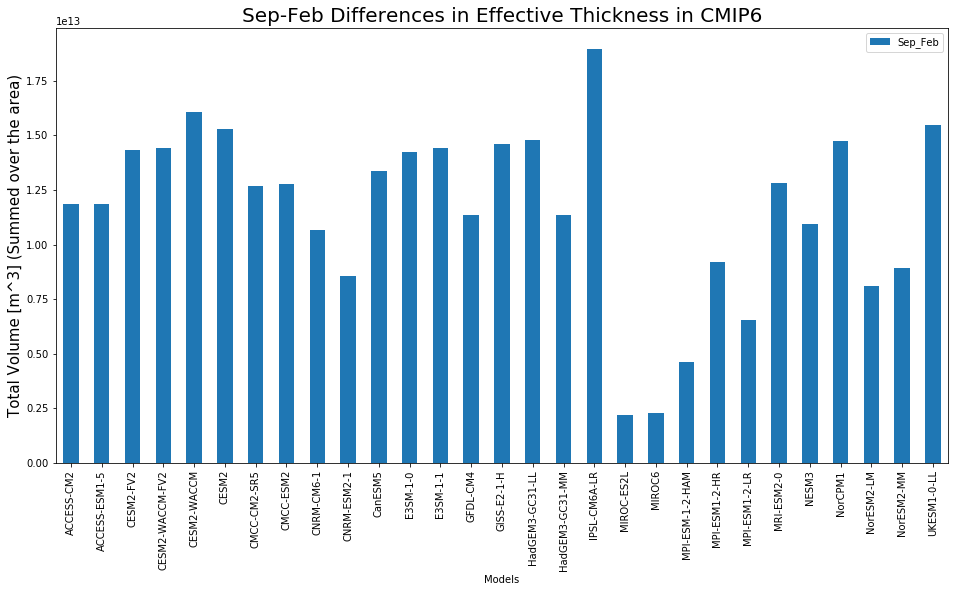

In [115]:
Cluster_DF.plot(x='Models',kind='bar',figsize=(16,8))
plt.title("Sep-Feb Differences in Effective Thickness in CMIP6",fontsize=20)
plt.ylabel("Total Volume [m^3] (Summed over the area)",fontsize=15)

# plt.savefig('Sep-Feb_Differences_CMIP6.pdf',dpi=300, bbox_inches='tight')

plt.show()

In [116]:
import matplotlib.cm as cm
from sklearn.metrics import r2_score
import scipy.stats

### Making dataframes for monthly averages over all the timesteps:

These monthly averages will be used for looking at the Volume distributions in the form of bar plots.

In [117]:
def Mod_Vols_RN_Avg(SIC,SIT,Area):
    Volume =(((SIC.siconc.sel(time=slice('1979-01-01','2015-01-01'))*SIT.sithick.sel(time=
           slice('1979-01-01','2015-01-01'))*Area))/100).sum(dim=['ni','nj'],skipna=True)
    return(Volume)

In [118]:
# Dataframe for SIT Averages:

# excluded are the models with extreme values:

Mod_RN_Avg_list = pd.DataFrame(
    {'Time': GIOMAS_SIT.time,
     ds_sic_1.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_1,ds_sit_1,wgt_gc_models),
     ds_sic_2.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_2,ds_sit_2,wgt_gc_models),
     ds_sic_3.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_3,ds_sit_3,wgt_gc_models),
     ds_sic_4.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_4,ds_sit_4,wgt_gc_models),
     ds_sic_5.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_5,ds_sit_5,wgt_gc_models),
     ds_sic_6.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_6,ds_sit_6,wgt_gc_models),
     ds_sic_7.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_7,ds_sit_7,wgt_gc_models),
     ds_sic_8.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_8,ds_sit_8,wgt_gc_models),
     ds_sic_9.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_9,ds_sit_9,wgt_gc_models),
     ds_sic_10.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_10,ds_sit_10,wgt_gc_models),
     ds_sic_11.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_11,ds_sit_11,wgt_gc_models),
     ds_sic_12.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_12,ds_sit_12,wgt_gc_models),
#      ds_sic_13.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_13,ds_sit_13,wgt_gc_models),
     ds_sic_14.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_14,ds_sit_14,wgt_gc_models),
#      ds_sic_15.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_15,ds_sit_15,wgt_gc_models),
#      ds_sic_16.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_16,ds_sit_16,wgt_gc_models),
#      ds_sic_17.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_17,ds_sit_17,wgt_gc_models),
#      ds_sic_18.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_18,ds_sit_18,wgt_gc_models),
#      ds_sic_19.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_19,ds_sit_19,wgt_gc_models),
     ds_sic_20.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_20,ds_sit_20,wgt_gc_models),
     ds_sic_21.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_21,ds_sit_21,wgt_gc_models),
     ds_sic_22.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_22,ds_sit_22,wgt_gc_models),
     ds_sic_23.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_23,ds_sit_23,wgt_gc_models),
     ds_sic_24.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_24,ds_sit_24,wgt_gc_models),
     ds_sic_25.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_25,ds_sit_25,wgt_gc_models),
     ds_sic_26.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_26,ds_sit_26,wgt_gc_models),
     ds_sic_27.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_27,ds_sit_27,wgt_gc_models),
     ds_sic_28.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_28,ds_sit_28,wgt_gc_models),
     ds_sic_29.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_29,ds_sit_29,wgt_gc_models),
     ds_sic_30.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_30,ds_sit_30,wgt_gc_models),
     ds_sic_31.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_31,ds_sit_31,wgt_gc_models),
     ds_sic_32.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_32,ds_sit_32,wgt_gc_models),
     ds_sic_33.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_33,ds_sit_33,wgt_gc_models),
     ds_sic_34.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_34,ds_sit_34,wgt_gc_models),
     ds_sic_35.attrs['source_id']: Mod_Vols_RN_Avg(ds_sic_35,ds_sit_35,wgt_gc_models),
     'GIOMAS': (GIOMAS_SIT*wgt_gc_models).sum(dim=['ni','nj'],skipna=True),
     'GECCO3': (GECCO_SIT*wgt_gc_models).sum(dim=['ni','nj'],skipna=True),
                                  })                                                            

In [119]:
Mod_RN_Avg_list['MMM'] = Mod_RN_Avg_list.iloc[:, 1:30].mean(axis=1)

In [120]:
df = pd.DataFrame(
    {'Time': GREP_SIT.time,
     'GREP'  : (GREP_SIT*wgt_gc_models).sum(dim=['ni','nj'],skipna=True),
                                  })   

In [121]:
df1 = pd.DataFrame(
    {'Time': sit_Obs_Regridded.time,
     'ENV-CS2'  : (sit_Obs_Regridded*wgt_gc_models).sum(dim=('ni','nj'),skipna=True),
                                  })   

# Boxplots: 

In [122]:
Mod_RN_Avg_list['GREP'] = df.iloc[:, 1:2]
Mod_RN_Avg_list['ENV-CS2'] = df1.iloc[:, 1:2]

In [125]:
# Mod_RN_Avg_list.iloc[:, 30:36]

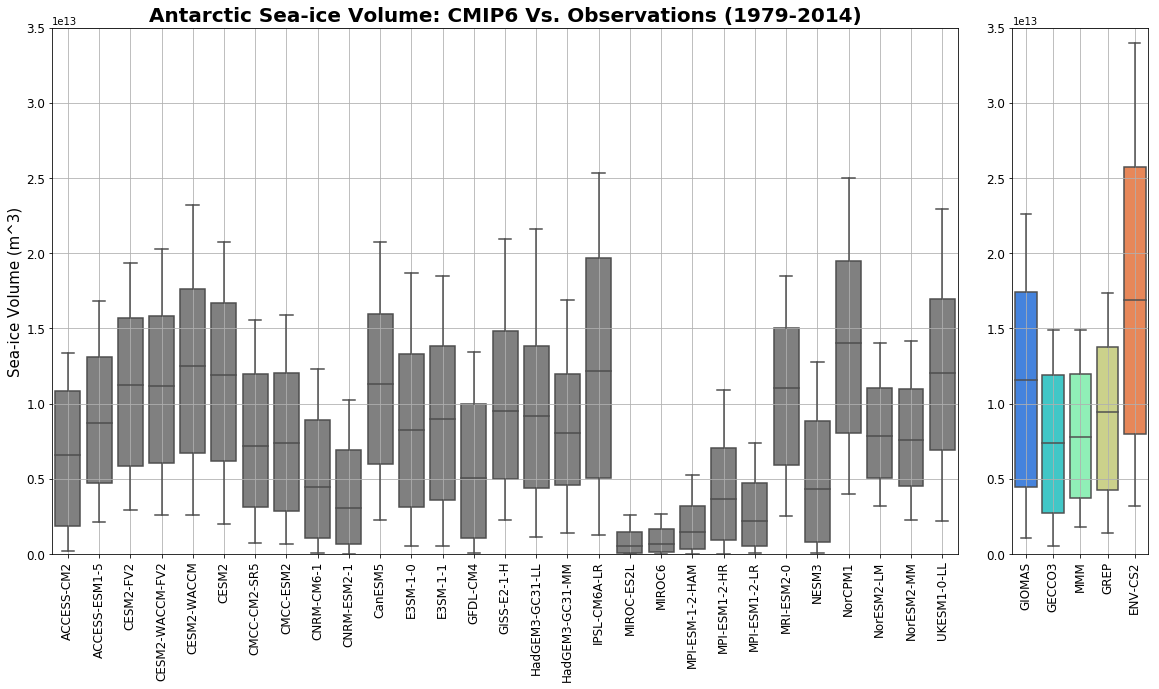

In [133]:
fig, (ax, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [10, 1.5]},figsize=(16,8))
ax.set_ylim([0*10**13, 3.5*10**13])
ax1.set_ylim([0*10**13, 3.5*10**13])
sns.boxplot(data=Mod_RN_Avg_list.iloc[:, 1:30],ax=ax, color="grey")
sns.boxplot(data=Mod_RN_Avg_list.iloc[:, 30:36],ax=ax1, palette = "rainbow")

fig.tight_layout()

ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)

ax.set_ylabel('Sea-ice Volume (m^3)',fontsize=15)
ax.set_title('Antarctic Sea-ice Volume: CMIP6 Vs. Observations (1979-2014)',fontsize=20,fontweight='bold')

ax.tick_params(axis='x', rotation=90, labelsize=12)
ax1.tick_params(axis='x', rotation=90 , labelsize=12)

ax.tick_params(axis='y', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax.grid(True)
ax1.grid(True)

# plt.savefig('Boxplot_Circumpolar_All.pdf',dpi=300, bbox_inches='tight')

plt.show()


# Error Matrix:

In [134]:
Matrix_AllModels = Mod_RN_ACycle_list.iloc[:,1:30]

In [135]:
#absolute deviations of model values from observations:
# 1. GIOMAS:

Error_Matrix_Models_GIOMAS = abs(Matrix_AllModels.sub(Mod_RN_ACycle_list['GIOMAS'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_GIOMAS['Time'] = Mod_RN_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==1)]
Feb_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==2)]
Mar_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==3)]
Apr_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==4)]
May_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==5)]
Jun_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==6)]
Jul_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==7)]
Aug_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==8)]
Sep_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==9)]
Oct_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==10)]
Nov_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==11)]
Dec_Error_Matrix_Models_GIOMAS = Error_Matrix_Models_GIOMAS[(Error_Matrix_Models_GIOMAS['Time']==12)]


# 2. GECCO3:

Error_Matrix_Models_GECCO3 = abs(Matrix_AllModels.sub(Mod_RN_ACycle_list['GECCO3'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_GECCO3['Time'] = Mod_RN_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==1)]
Feb_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==2)]
Mar_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==3)]
Apr_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==4)]
May_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==5)]
Jun_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==6)]
Jul_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==7)]
Aug_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==8)]
Sep_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==9)]
Oct_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==10)]
Nov_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==11)]
Dec_Error_Matrix_Models_GECCO3 = Error_Matrix_Models_GECCO3[(Error_Matrix_Models_GECCO3['Time']==12)]


# 3. GREP:

Error_Matrix_Models_GREP = abs(Matrix_AllModels.sub(Mod_RN_ACycle_list['GREP'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_GREP['Time'] = Mod_RN_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==1)]
Feb_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==2)]
Mar_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==3)]
Apr_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==4)]
May_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==5)]
Jun_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==6)]
Jul_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==7)]
Aug_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==8)]
Sep_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==9)]
Oct_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==10)]
Nov_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==11)]
Dec_Error_Matrix_Models_GREP = Error_Matrix_Models_GREP[(Error_Matrix_Models_GREP['Time']==12)]



# 4. EV_CS2:

Error_Matrix_Models_EV_CS2 = abs(Matrix_AllModels.sub(Mod_EC2_ACycle_list['EV-CS2'], axis=0)) 

# FOR MONTHS:
Error_Matrix_Models_EV_CS2['Time'] = Mod_EC2_ACycle_list['Time'] #ADDING TIME COMPONENT FOR FILTERING

Jan_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==1)]
Feb_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==2)]
Mar_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==3)]
Apr_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==4)]
May_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==5)]
Jun_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==6)]
Jul_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==7)]
Aug_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==8)]
Sep_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==9)]
Oct_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==10)]
Nov_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==11)]
Dec_Error_Matrix_Models_EV_CS2 = Error_Matrix_Models_EV_CS2[(Error_Matrix_Models_EV_CS2['Time']==12)]

In [136]:
#sum of absolute deviations of model values from observation

# ADDING all the absolute error means in one dataframe for plotting a matrix: 

MultiModel_Error_Matrix_GIOMAS = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_GIOMAS.iloc[:,0:30].sum(axis=0),
    })


MultiModel_Error_Matrix_GECCO3 = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_GECCO3.iloc[:,0:30].sum(axis=0),
    })


MultiModel_Error_Matrix_GREP = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_GREP.iloc[:,0:30].sum(axis=0),
    })


MultiModel_Error_Matrix_EV_CS2 = pd.DataFrame(
    {'Annual': (Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0)/12),
     'Jan'   :   Jan_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Feb'   :   Feb_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Mar'   :   Mar_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Apr'   :   Apr_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'May'   :   May_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Jun'   :   Jun_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Jul'   :   Jul_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Aug'   :   Aug_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Sep'   :   Sep_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Oct'   :   Oct_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Nov'   :   Nov_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
     'Dec'   :   Dec_Error_Matrix_Models_EV_CS2.iloc[:,0:30].sum(axis=0),
    })

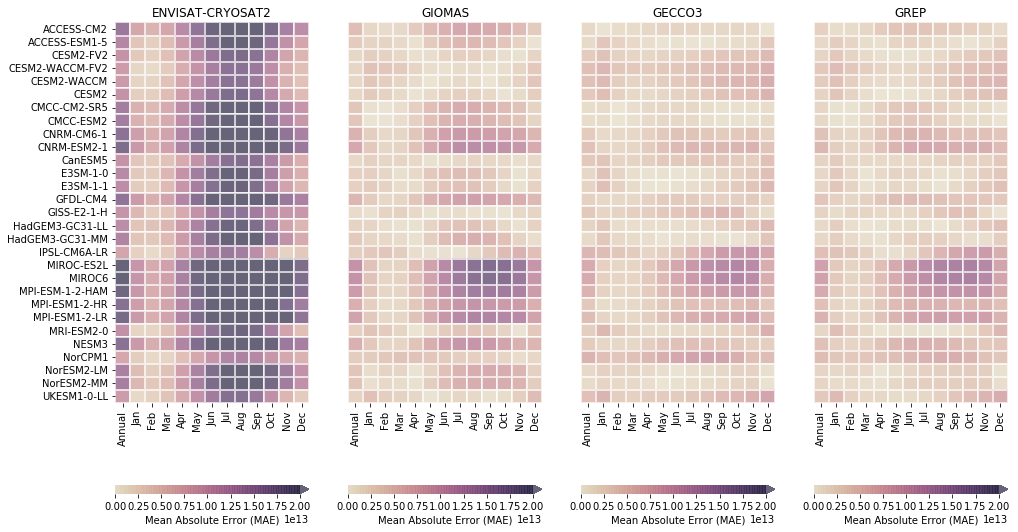

In [137]:
fig, (axes) = plt.subplots(1, 4, figsize=(16, 10))

cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
#cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

cbar_kws={"label":"Mean Absolute Error (MAE)","orientation":"horizontal","shrink":1,"extend":"max",
          'drawedges':False}


ax1 = axes[0]
sns.heatmap(MultiModel_Error_Matrix_EV_CS2.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,cmap=cmap,vmin=0*10**13, vmax=2*10**13,cbar_kws = cbar_kws,ax=ax1)
ax1.set_title("ENVISAT-CRYOSAT2")

ax2 = axes[1]
sns.heatmap(MultiModel_Error_Matrix_GIOMAS.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,cmap=cmap,vmin=0*10**13, vmax=2*10**13,cbar_kws = cbar_kws,ax=ax2)
ax2.set_yticks([])
ax2.set_title("GIOMAS")

ax3 = axes[2]
sns.heatmap(MultiModel_Error_Matrix_GECCO3.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,cmap=cmap,vmin=0*10**13, vmax=2*10**13,cbar_kws = cbar_kws,ax=ax3)
ax3.set_yticks([])
ax3.set_title("GECCO3")

ax4 = axes[3]
sns.heatmap(MultiModel_Error_Matrix_GREP.iloc[:-1,:], linewidth=1, linecolor='w', square=False, alpha=0.7,
            robust=True,vmin=0*10**13, vmax=2*10**13,cmap=cmap,cbar_kws = cbar_kws,ax=ax4)
ax4.set_yticks([])
ax4.set_title("GREP")

# plt.xlabel("Time-Period",fontsize=16)
# ax1.set_ylabel("Model Names",fontsize=16)
# plt.title("Model Bias Matrix: Mean absolute deviation for SIT",fontsize=20)

# plt.tick_params(axis='x', labelsize=12)
# plt.tick_params(axis='y', labelsize=12)

# plt.savefig('SIT_Obs_Models_ErrorMatrix_AAR.pdf',dpi=300, bbox_inches='tight')

plt.show()

# Linear Regressions for SIT:

In [233]:
slope, intercept, r_value, p_value, std_err = linregress(Feb.index, Feb['MMM'])
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 0.000418, intercept: -0.030413
R-squared: 0.002570


## Linear Regression for Multi-model and Observation Anomalies:

In [70]:
Mod_RN_Avg_list.fillna(0,inplace=True)

In [71]:
slope_list_monwise =[]
error_list_monwise =[]
AllMod_slope_list_monwise = []

for i in range(1,13):
    mon_list = Mod_RN_Avg_list[(Mod_RN_Avg_list['Time'].dt.month == i)]
    mon_lingress = mon_list.iloc[:,1:30].apply(lambda x: linregress(list(range(1,len(mon_list.iloc[:,1:30].index)+1)), x), 
                                                     result_type='expand').rename(index={0: 'slope', 1: 
                                                                                  'intercept', 2: 'rvalue', 3:
                                                                                  'p-value', 4:'stderr'})
    slope_list_monwise.append(mon_lingress.mean(axis=1)[0])
    error_list_monwise.append(mon_lingress.std(axis=1)[4])
    AllMod_slope_list_monwise.append(mon_lingress.iloc[0])

    
    
slope_list_GIOMAS =[]
error_list_GIOMAS =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i].index)+1)), 
                                                             Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i]['GIOMAS'])
    slope_list_GIOMAS.append(slope)
    error_list_GIOMAS.append(std_err)
    
    

slope_list_GECCO3 =[]
error_list_GECCO3 =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i].index)+1)), 
                                                             Mod_RN_Avg_list[Mod_RN_Avg_list['Time'].dt.month == i]['GECCO3'])
    slope_list_GECCO3.append(slope)
    error_list_GECCO3.append(std_err)
    
    

    
slope_list_GREP =[]
error_list_GREP =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(df[df['Time'].dt.month == i].index)+1)), 
                                                             df[df['Time'].dt.month == i]['GREP'])
    slope_list_GREP.append(slope)
    error_list_GREP.append(std_err)
    
    
    
slope_list_EN_CS2 =[]
error_list_EN_CS2 =[]

for i in range(1,13):
    slope, intercept, r_value, p_value, std_err = linregress(list(range(1,len(df1[df1['Time'].dt.month == i].index)+1)), 
                                                             df1[df1['Time'].dt.month == i]['ENV-CS2'])
    slope_list_EN_CS2.append(slope)
    error_list_EN_CS2.append(std_err)    


In [72]:
LinearReg_df = pd.DataFrame(
    {'MMM': slope_list_monwise,
#      'Error_MMM': error_list_monwise,
     'GIOMAS': slope_list_GIOMAS,
     'GECCO3': slope_list_GECCO3,
     'GREP': slope_list_GREP,
     'ENV-CS2': slope_list_EN_CS2,
#      'Error_GIOMAS': error_list_GIOMAS,
     'Months': list(calendar.month_abbr)[1:13],
    })


In [73]:
df_Annual_LR = pd.DataFrame(AllMod_slope_list_monwise)

df_Annual_LR['Months'] = list(calendar.month_abbr)[1:13]

In [74]:
Seasonal_df = pd.DataFrame(
    {'Advance': Adv_LR.iloc[0,:],
     'Retreat': Ret_LR.iloc[0,:],
    })

Seasonal_df = Seasonal_df.T
Seasonal_df['Seasons'] = [ 'Advance','Retreat']

NameError: name 'Adv_LR' is not defined

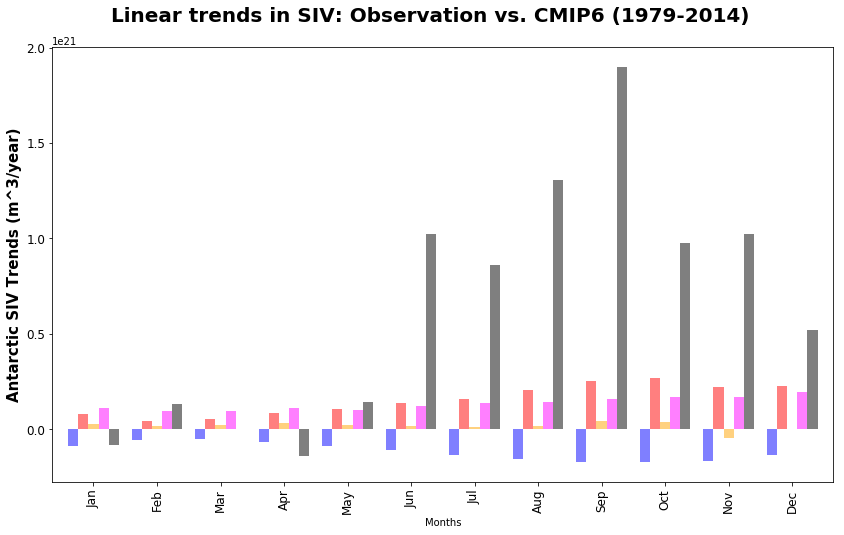

In [75]:
fig, ax1 = plt.subplots(1, 1,figsize=(14,8))

fig.suptitle("Linear trends in SIV: Observation vs. CMIP6 (1979-2014)", fontweight ='bold',fontsize=20, y=0.95)

# ax1.set_ylim(-0.05, 0.05)

LinearReg_df.plot(x="Months", y=["MMM","GIOMAS","GECCO3","GREP","ENV-CS2"],
                     kind="bar",width=0.8,alpha=0.5,
                     color=['blue','red','orange','magenta','black'], ax=ax1)
# df_Annual_LR.plot(x="Months",
#                      marker='.', linestyle='none',alpha=1.0,
#                      color=['black'], ax=ax1)
ax1.get_legend().remove()

ax1.set_ylabel('Antarctic SIV Trends (m^3/year)', fontweight ='bold',fontsize=15)


ax1.tick_params(axis='x', labelsize=12)
# ax2.tick_params(axis='x', labelsize=12)

ax1.tick_params(axis='y', labelsize=12)
# ax2.tick_params(axis='y', labelsize=12)

# plt.subplots_adjust(hspace=0.07)
# plt.tight_layout(h_pad=1.0)

# plt.savefig('SIT_Linear_Trends_Circumpolar_Ann_ARS.pdf',dpi=300, bbox_inches='tight')
plt.show()

In [171]:
test = Seasonal_df.iloc[:,0:35][(Seasonal_df.iloc[:,0:35] >0 )]

In [173]:
# To count the number of models showing positive or negative trends: 
# test.iloc[0:1,:].count(axis='rows') #Advance
# test.iloc[1:2,:].count(axis='rows') #Retreat
test.iloc[0:2,:].count(axis='rows') #Both

ACCESS-CM2           0
ACCESS-ESM1-5        0
CESM2-FV2            2
CESM2-WACCM-FV2      0
CESM2-WACCM          0
CESM2                0
CMCC-CM2-SR5         0
CMCC-ESM2            1
CNRM-CM6-1           1
CNRM-ESM2-1          0
CanESM5              2
E3SM-1-0             1
E3SM-1-1-ECA         2
E3SM-1-1             1
EC-Earth3-AerChem    1
EC-Earth3-CC         0
EC-Earth3-Veg-LR     1
EC-Earth3-Veg        1
EC-Earth3            1
GFDL-CM4             2
GISS-E2-1-H          1
HadGEM3-GC31-LL      0
HadGEM3-GC31-MM      0
IPSL-CM6A-LR         0
MIROC-ES2L           2
MIROC6               0
MPI-ESM-1-2-HAM      0
MPI-ESM1-2-HR        0
MPI-ESM1-2-LR        0
MRI-ESM2-0           2
NESM3                1
NorCPM1              1
NorESM2-LM           0
NorESM2-MM           0
UKESM1-0-LL          0
dtype: int64

# Spatial Trends:

In [12]:
#Filter observation data based on months in a particular season:
Obs_DJF = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([1,2,12]))
Obs_MAM = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([3,4,5]))
Obs_JJA = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([6,7,8]))
Obs_SON = sit_Obs.sel(time=sit_Obs.time.dt.month.isin([9,10,11]))

In [ ]:
#Filter regridded observation data based on months in a particular season:

In [56]:
#Funstion for deliniating Advance and Retreat seasons:
def SpatialPlots_Mon(data,mon):
    month = data.sel(time=data.time.dt.month.isin([mon]))
    return(month)

In [13]:
Obs_Trend = linear_trend(sit_Obs, 'time')

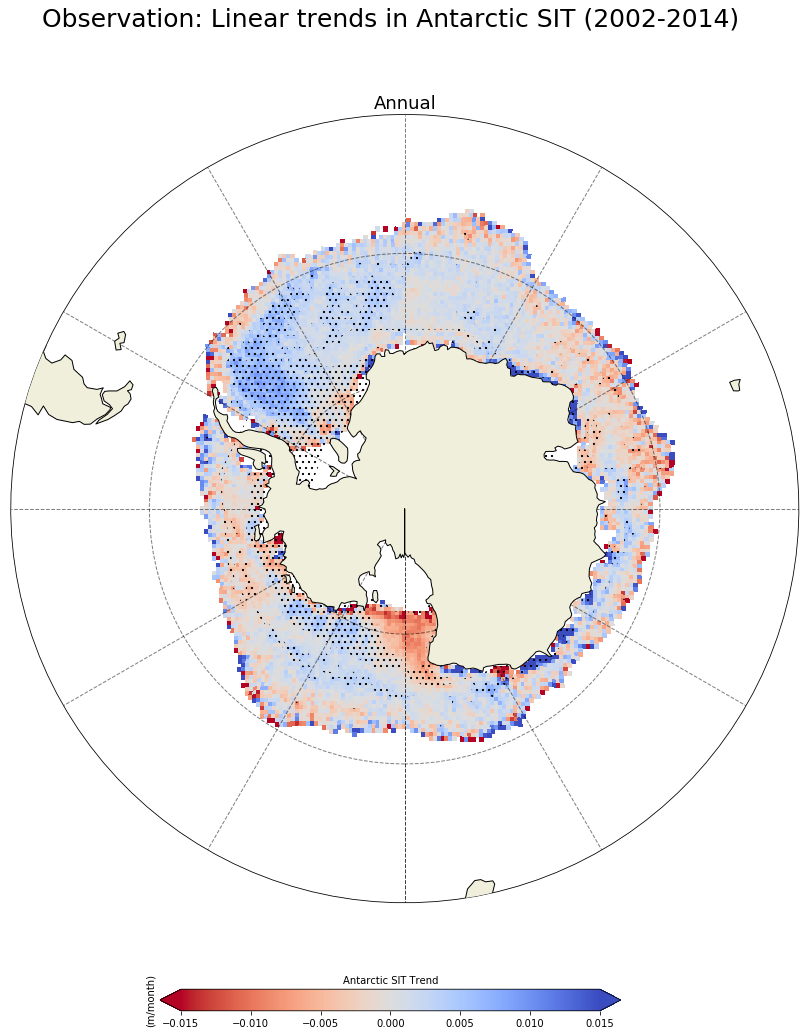

In [14]:
fig = plt.figure(figsize=(16,15))

ax = plt.subplot(1,1,1,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(sit_Obs, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.015,vmax=0.015) 
levels = [Obs_Trend.p_value.min(), 0.05, Obs_Trend.p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,Obs_Trend.p_value, levels=levels, hatches=["..", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("Annual", fontsize=18, y=1)

fig.suptitle("Observation: Linear trends in Antarctic SIT (2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('Antarctic SIT Trend',fontsize=10)
cbar.ax.set_ylabel('(m/month)', fontsize=10)
plt.show()


/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

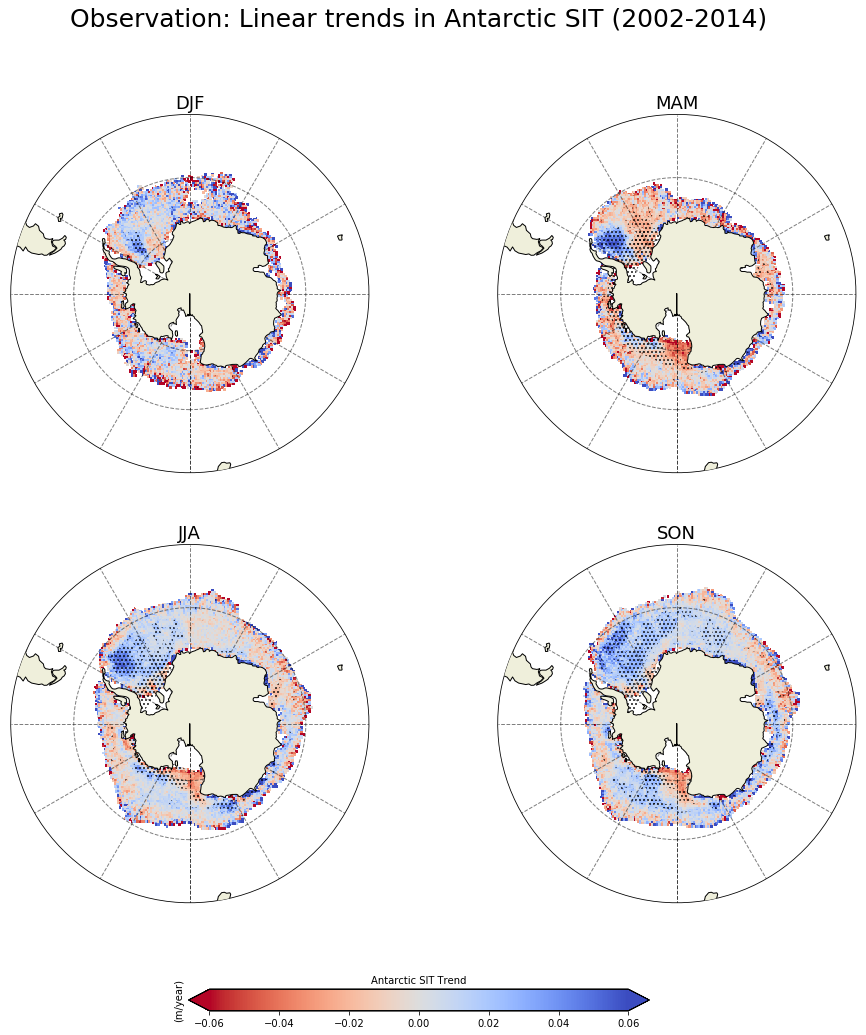

In [15]:
fig = plt.figure(figsize=(16,15))

ax = plt.subplot(2,2,1,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_DJF, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 
levels = [linear_trend(Obs_DJF, 'time').p_value.min(), 0.05, linear_trend(Obs_DJF, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_DJF, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("DJF", fontsize=18, y=1)




ax = plt.subplot(2,2,2,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_MAM, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 
levels = [linear_trend(Obs_MAM, 'time').p_value.min(), 0.05, linear_trend(Obs_MAM, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_MAM, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("MAM", fontsize=18, y=1)





ax = plt.subplot(2,2,3,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_JJA, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 

levels = [linear_trend(Obs_JJA, 'time').p_value.min(), 0.05, linear_trend(Obs_JJA, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_JJA, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("JJA", fontsize=18, y=1)



ax = plt.subplot(2,2,4,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -45, -90], crs=ccrs.PlateCarree())
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = int(360/dmeridian + 1)
num_parra = int(90/dparallel + 1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=np.linspace(-180, 180, num_merid), \
                  ylocs=np.linspace(0, -90, num_parra), \
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

CS = ax.pcolormesh(dsOb.lon,dsOb.lat,linear_trend(Obs_SON, 'time').slope,cmap = plt.cm.coolwarm_r,
                   transform=ccrs.PlateCarree(),vmin=-0.06,vmax=0.06) 
levels = [linear_trend(Obs_SON, 'time').p_value.min(), 0.05, linear_trend(Obs_SON, 'time').p_value.max()]
ax.contourf(dsOb.lon,dsOb.lat,linear_trend(Obs_SON, 'time').p_value, levels=levels, hatches=["...", ""], alpha=0,
           transform=ccrs.PlateCarree())

cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
plt.subplots_adjust(hspace=.2, bottom = .15)
plt.subplots_adjust(hspace=.2, bottom = .15)
ax.set_title("SON", fontsize=18, y=1)

fig.suptitle("Observation: Linear trends in Antarctic SIT (2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('Antarctic SIT Trend',fontsize=10)
cbar.ax.set_ylabel('(m/year)', fontsize=10)

plt.savefig('SIT_Linear_Trends_Obs.pdf',dpi=300, bbox_inches='tight')

plt.show()


/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([], <a list of 0 Text xticklabel objects>)

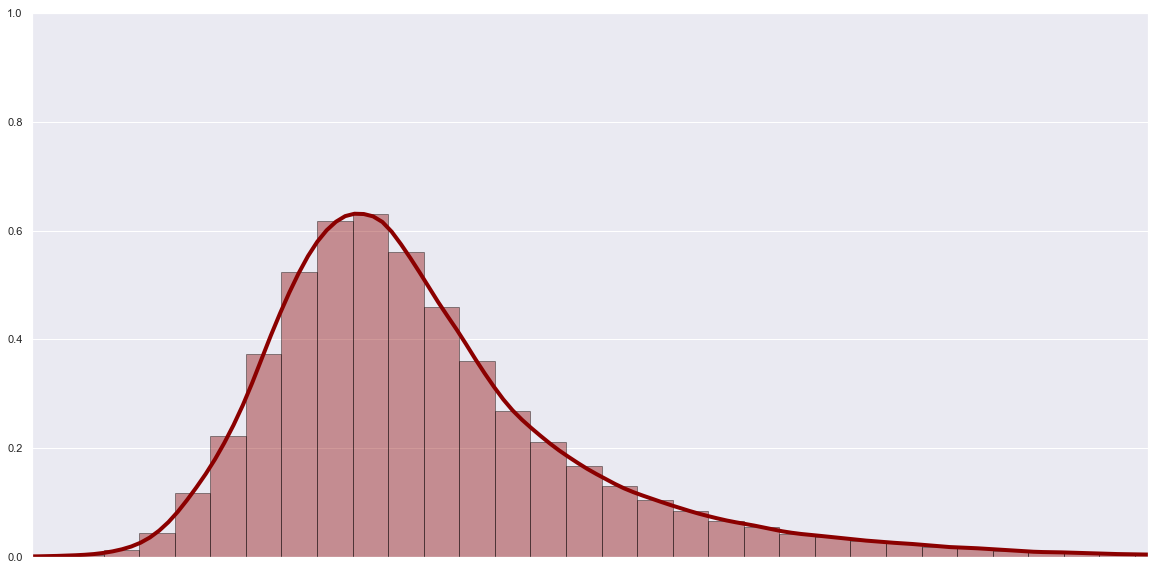

In [286]:
g2 = sns.distplot(sit_Obs_Regridded, hist=True, kde=True, 
             color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4})

g2.set(ylabel="")
g2.set(xlabel="")

g2.set(ylim=(0, 1))
g2.set(xlim=(0, 6))

# g2.set(yticks=[])
# g2.set(xticks=[])

plt.xticks([])

In [ ]:
ax = plt.subplot(6,6,1)
plt.xticks([])

ax = plt.subplot(6,6,2)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,3)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,4)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,5)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,6) 
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,7)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])


ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])
plt.yticks([])


ax = plt.subplot(6,6,35)
plt.xticks([])


ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

ax = plt.subplot(6,6,35)
plt.xticks([])

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

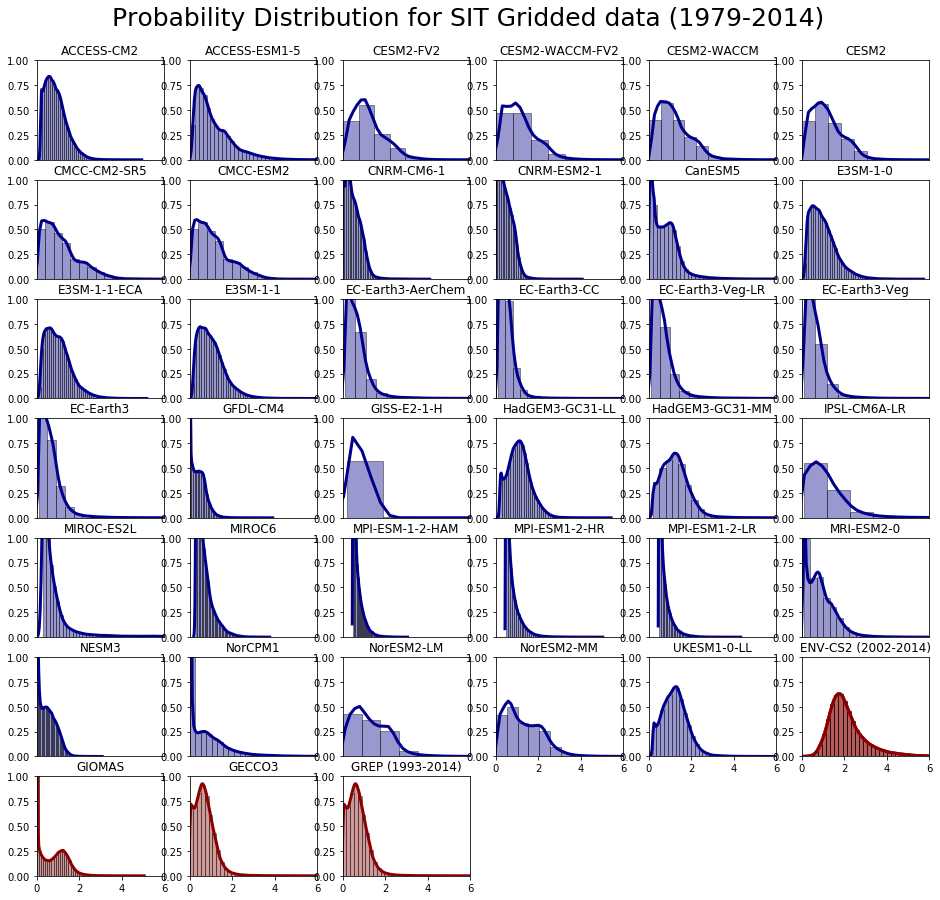

In [54]:
fig = plt.figure(figsize=[16,15])


for i in range(1,36):
    ax = plt.subplot(7,6,i)
    this = sns.distplot(xr.open_dataset(mydir+myfiles[i-1]).sithick.sel(time=slice('2002-06-01','2015-01-01')), 
                 hist=True, kde=True, color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 3})
    this.set(ylabel="")
    this.set(xlabel="")
    this.set(ylim=(0, 1))
    this.set(xlim=(0, 6))
#     this.set(yticks=[])
#     this.set(xticks=[])
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)  

for i in range(1,34):
    ax = plt.subplot(7,6,i)
    plt.xticks([])

ax = plt.subplot(7,6,35)
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36)
this = sns.distplot(sit_Obs_Regridded, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("Observation")


ax = plt.subplot(7,6,35)
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36)
this = sns.distplot(sit_Obs_Regridded, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("ENV-CS2 (2002-2014)")


ax = plt.subplot(7,6,37)
this = sns.distplot(GIOMAS_SIT, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("GIOMAS")


ax = plt.subplot(7,6,38)
this = sns.distplot(GECCO_SIT, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("GECCO3")


ax = plt.subplot(7,6,39)
this = sns.distplot(GECCO_SIT, hist=True, 
             kde=True, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 3})
this.set(ylabel="")
this.set(xlabel="")
this.set(ylim=(0, 1))
this.set(xlim=(0, 6))

plt.title("GREP (1993-2014)")

# plt.subplots_adjust(hspace=.4, bottom = .3)

fig.suptitle("Probability Distribution for SIT Gridded data (1979-2014)",fontsize=25,y=0.93)

plt.savefig('SIT_PD_All_RN.pdf')

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

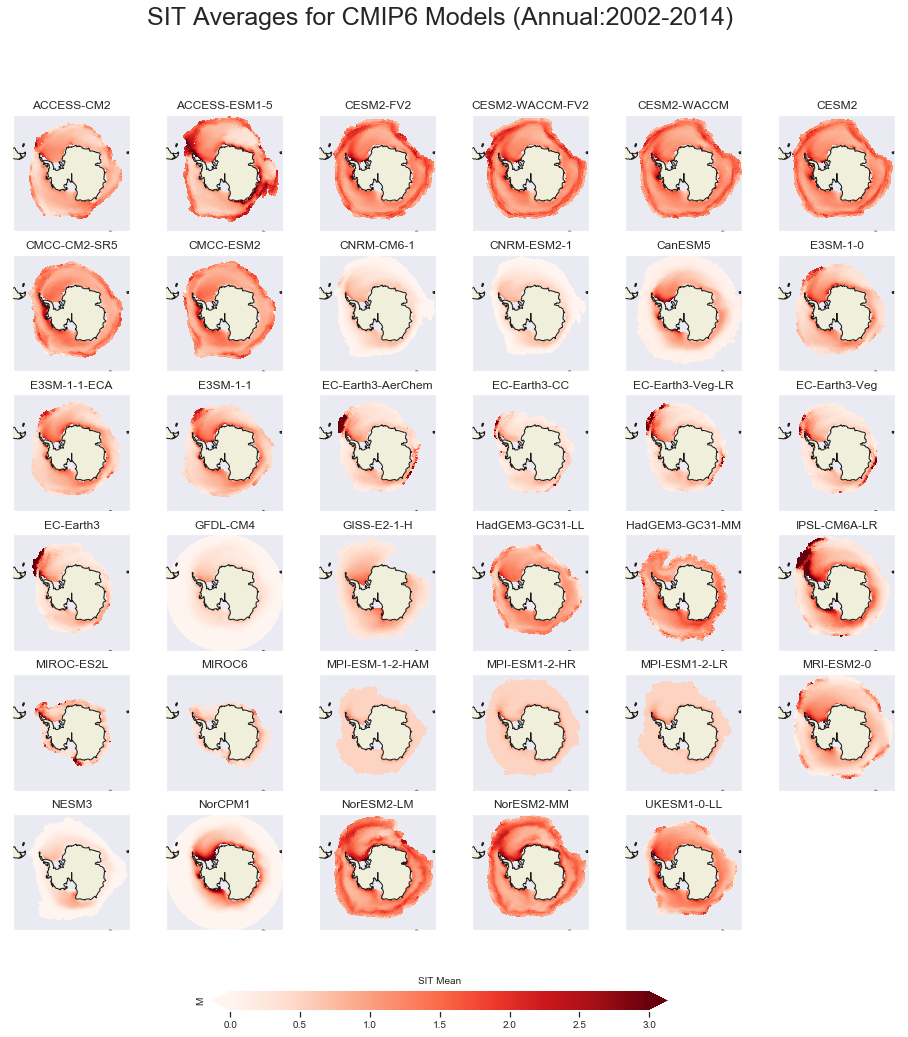

In [271]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         xr.open_dataset(mydir+myfiles[i-1]).sithick.sel(time=slice('2002-06-01','2015-01-01')).mean(dim='time'),transform=ccrs.PlateCarree(),
                         cmap = plt.cm.Reds, vmin=0, vmax=3)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


# ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
# ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
# ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
# this = ax.pcolormesh(ds_sit_Ob.lon,ds_sit_Ob.lat,ds_sit_Ob.sea_ice_thickness.mean(dim='time'),transform=ccrs.PlateCarree(),cmap = plt.cm.Reds, vmin=0, vmax=3)
# #CS = ax.contour(ds_sic_Ob.lon,ds_sic_Ob.lat,ds_sic_Ob.SIC.mean(dim='time'),[0.15],transform=ccrs.PlateCarree(),colors='k')
# plt.title("Observation (ESA-CCI+)")


fig.suptitle("SIT Averages for CMIP6 Models (Annual:2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('SIT_AVg_Annual.pdf')

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

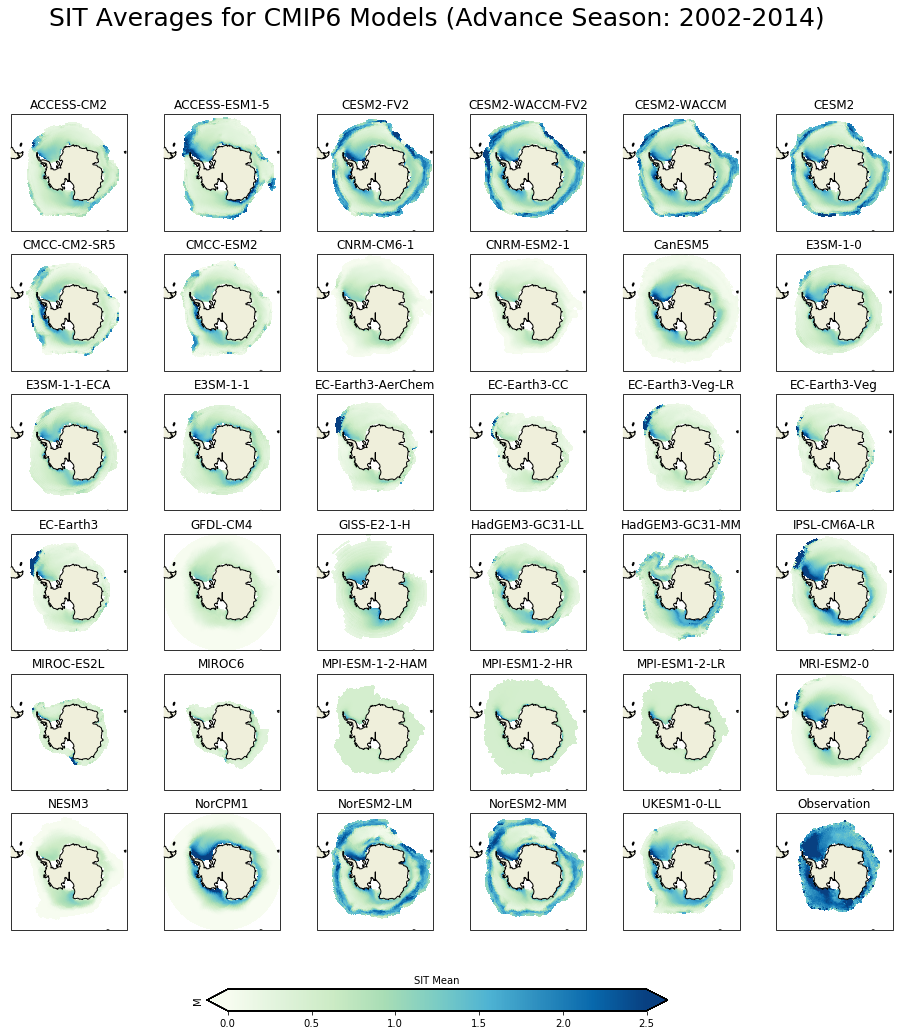

In [56]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         SpatialPlots_AR(clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2])[1].mean(dim='time'),transform=ccrs.PlateCarree(),
                         cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL")    

ax = plt.subplot(6,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
this = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,(SpatialPlots_AR(sit_Obs_Regridded)[1]).mean(dim='time'),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
plt.title("Observation")


fig.suptitle("SIT Averages for CMIP6 Models (Advance Season: 2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('SIT_Avg_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

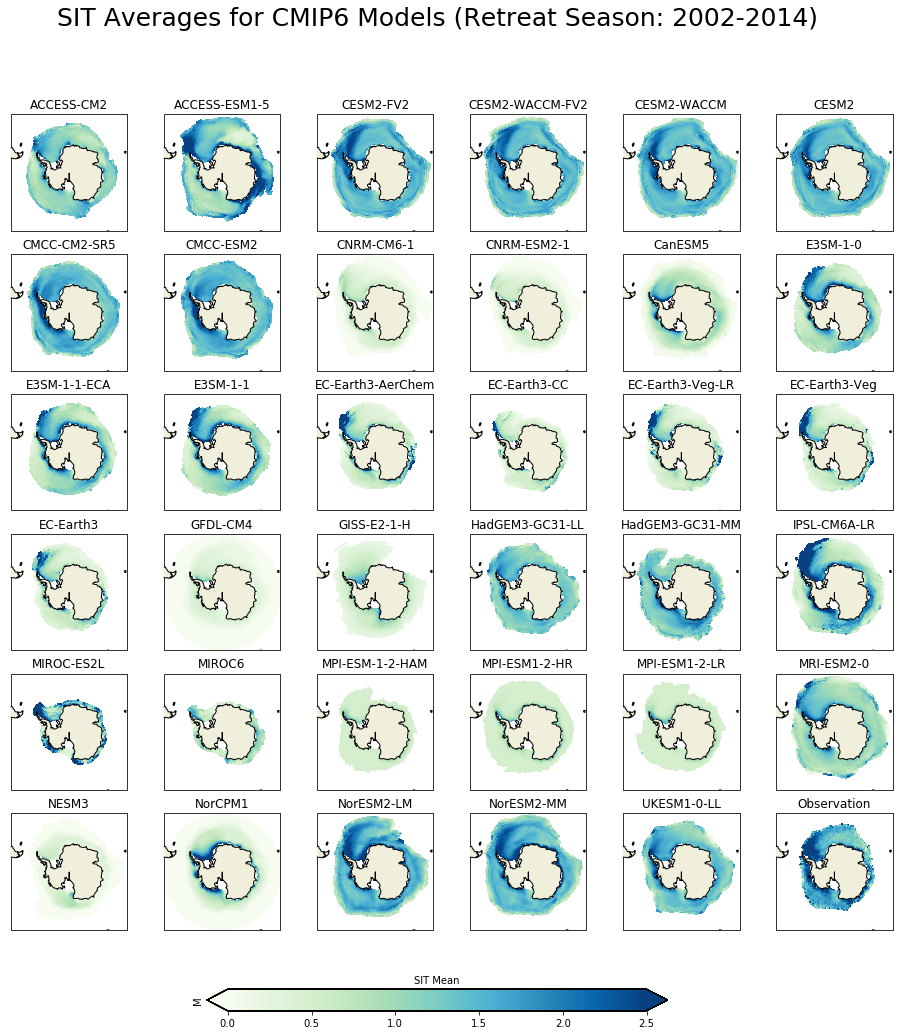

In [58]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         SpatialPlots_AR(clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2])[0].mean(dim='time'),transform=ccrs.PlateCarree(),
                         cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL")    

ax = plt.subplot(6,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
this = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,(SpatialPlots_AR(sit_Obs_Regridded)[0]).mean(dim='time'),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.GnBu, vmin=0, vmax=2.5)
plt.title("Observation")


fig.suptitle("SIT Averages for CMIP6 Models (Retreat Season: 2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('SIT_Avg_Ret.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

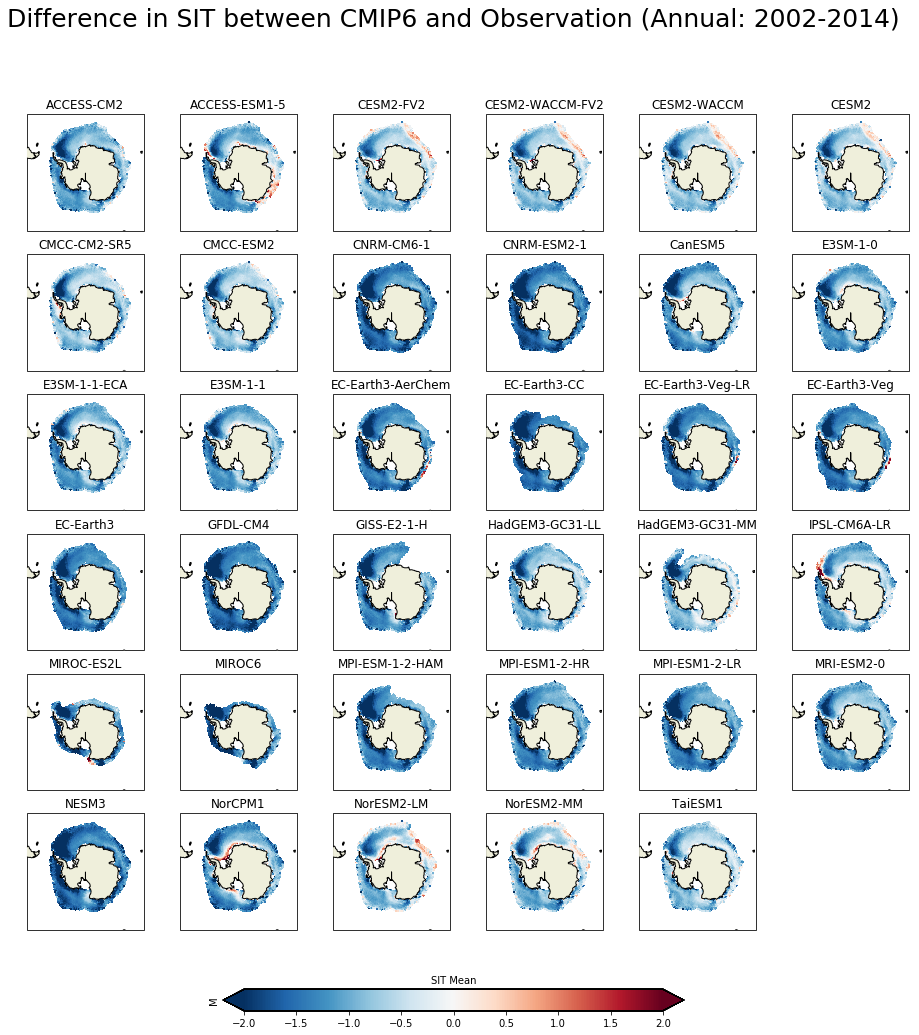

In [53]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         (clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2]).mean(dim='time')-sit_Obs_Regridded.mean(dim='time'),
                       transform=ccrs.PlateCarree(),
                         cmap = plt.cm.RdBu_r, vmin=-2, vmax=2)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


# ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
# ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
# ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
# this = ax.pcolormesh(ds_sit_Ob.lon,ds_sit_Ob.lat,ds_sit_Ob.sea_ice_thickness.mean(dim='time'),transform=ccrs.PlateCarree(),cmap = plt.cm.Reds, vmin=0, vmax=3)
# #CS = ax.contour(ds_sic_Ob.lon,ds_sic_Ob.lat,ds_sic_Ob.SIC.mean(dim='time'),[0.15],transform=ccrs.PlateCarree(),colors='k')
# plt.title("Observation (ESA-CCI+)")


fig.suptitle("Difference in SIT between CMIP6 and Observation (Annual: 2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

#plt.savefig('ClimMean_Observation.pdf')

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

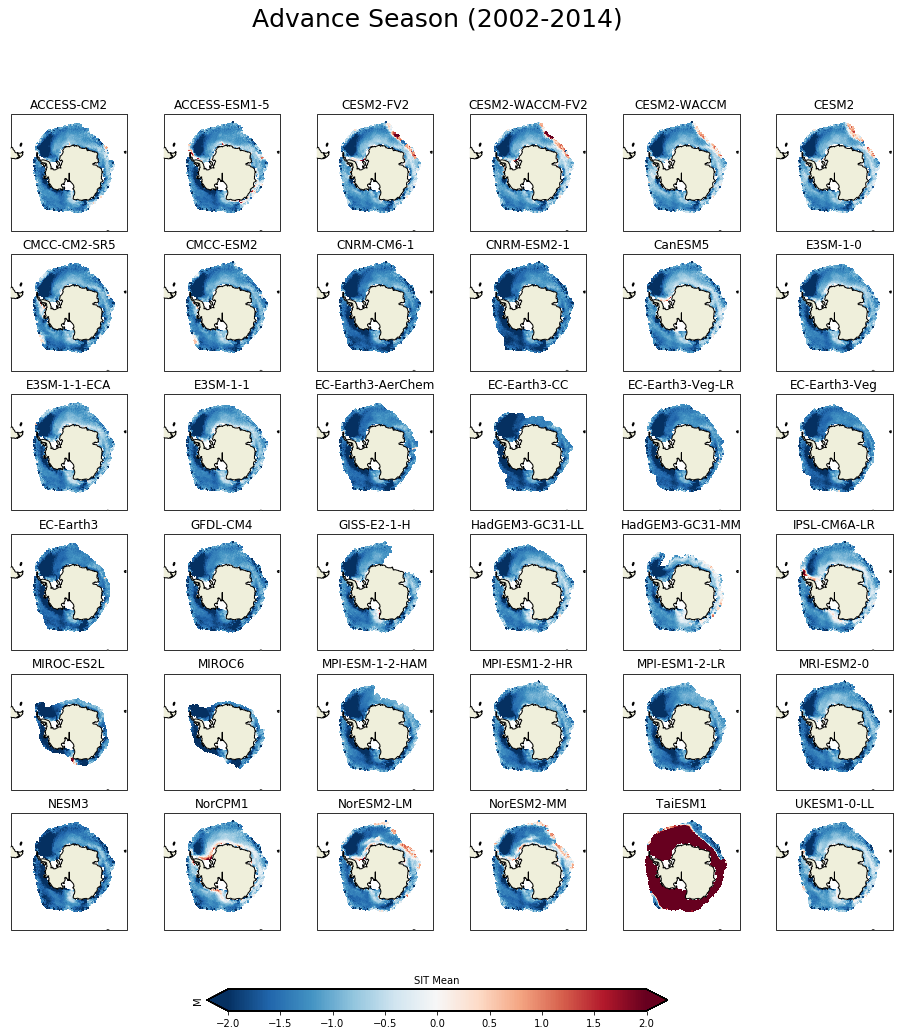

In [24]:
fig = plt.figure(figsize=[16,15])

for i in range(1,37):
    ax = plt.subplot(6,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         SpatialPlots_AR(clim_anom(xr.open_dataset(mydir+myfiles[i-1]))[2])[1].mean(dim='time')-SpatialPlots_AR(sit_Obs_Regridded)[1].mean(dim='time'),
                       transform=ccrs.PlateCarree(),
                         cmap = plt.cm.RdBu_r, vmin=-2, vmax=2)
    #CS = ax.contour(xr.open_dataset(mydir1+myfiles1[i-1]).lon,xr.open_dataset(mydir1+myfiles1[i-1]).lat,
    #                xr.open_dataset(mydir1+myfiles1[i-1]).siconc.mean(dim='time'),[15],transform=ccrs.PlateCarree(),
                    #colors='k')
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')


# ax = plt.subplot(6,6,35,projection = ccrs.SouthPolarStereo())
# ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
# ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
# this = ax.pcolormesh(ds_sit_Ob.lon,ds_sit_Ob.lat,ds_sit_Ob.sea_ice_thickness.mean(dim='time'),transform=ccrs.PlateCarree(),cmap = plt.cm.Reds, vmin=0, vmax=3)
# #CS = ax.contour(ds_sic_Ob.lon,ds_sic_Ob.lat,ds_sic_Ob.SIC.mean(dim='time'),[0.15],transform=ccrs.PlateCarree(),colors='k')
# plt.title("Observation (ESA-CCI+)")


fig.suptitle("Advance Season (2002-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.savefig('Spatial_Bias_AS.pdf')

plt.show()
plt.close()

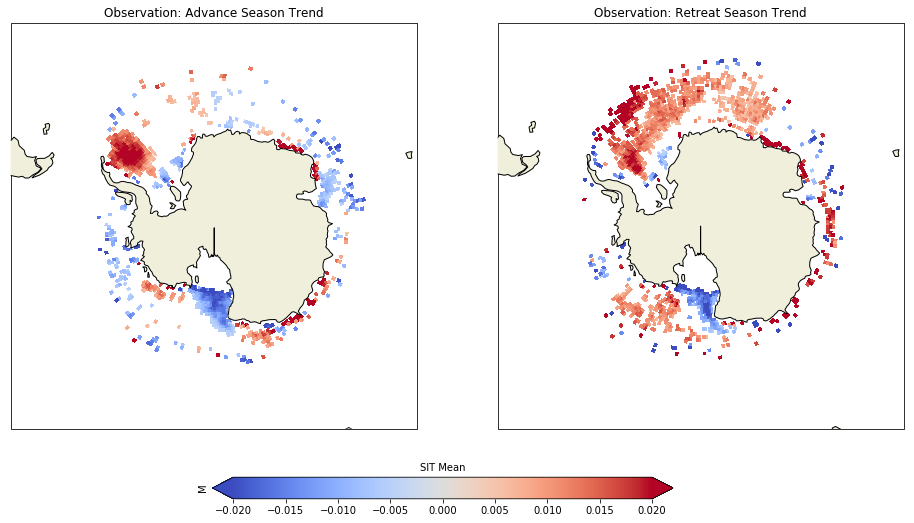

In [132]:
# Make a pcolor plot of sea ice concentration, and contour the sea ice edge
fig = plt.figure(figsize=[16,15])
ax = plt.subplot(1,2,1,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[1], 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,
                     (linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[1], 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("Observation: Advance Season Trend")

ax = plt.subplot(1,2,2,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')

p_val = linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[0], 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,
                     (linear_trend(SpatialPlots_AR(sit_Obs_Regridded)[0], 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("Observation: Retreat Season Trend")
cbar_ax = fig.add_axes([0.3, 0.25, 0.4, 0.02]) #[left, bottom, width, height]
cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M', fontsize=10)

plt.show()

In [57]:
def clim_anom_RN(data):
    sit = data.sithick.sel(time=slice('1979-01-01','2015-01-01'))
    clm = sit.groupby('time.month').mean(dim='time')
    anm = (sit.groupby('time.month') - clm)
    time= anm.time
    return (clm,anm,sit)

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

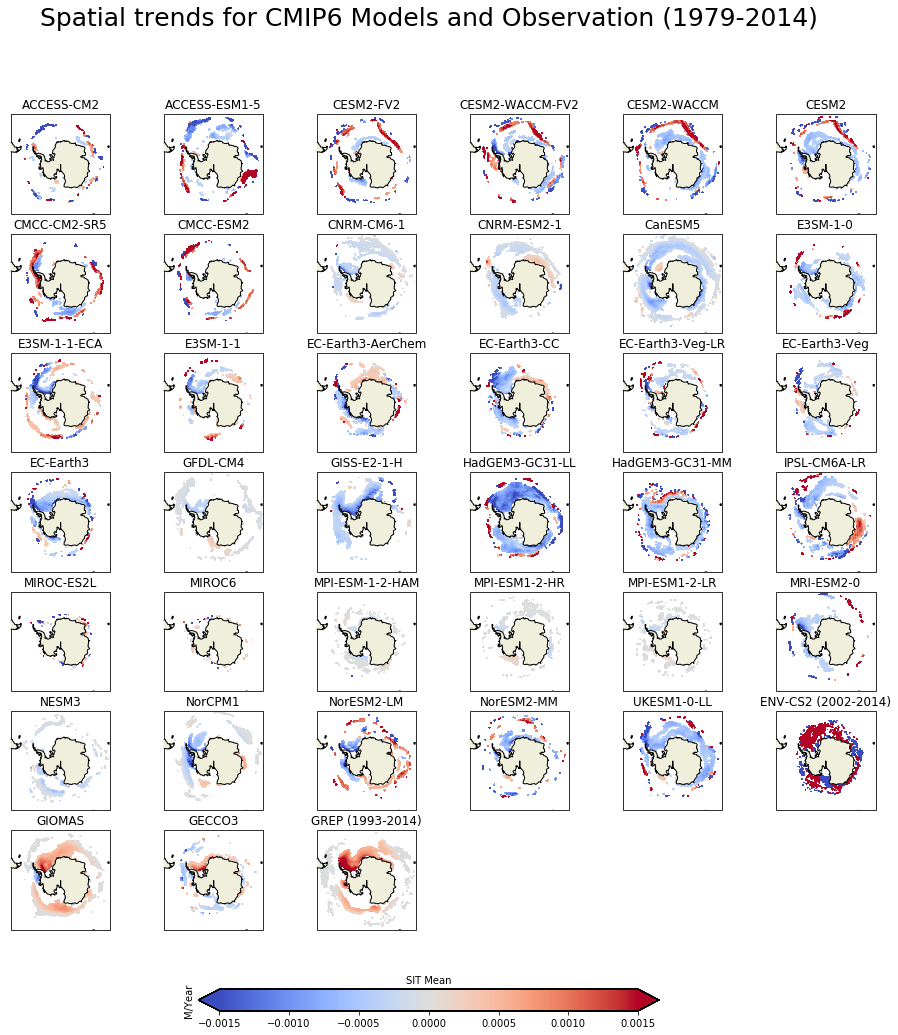

In [59]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    p_val = linear_trend((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]), 'time').p_value
    mask_PV = p_val.where(p_val < 0.05)

    CS = ax.pcolormesh(xr.open_dataset(mydir+myfiles[i-1]).lon,xr.open_dataset(mydir+myfiles[i-1]).lat,
                         (linear_trend((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((sit_Obs_Regridded), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(sit_Obs_Regridded.lon,sit_Obs_Regridded.lat,
                     (linear_trend((sit_Obs_Regridded), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("ENV-CS2 (2002-2014)")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((GIOMAS_SIT), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(GIOMAS_SIT.lon,GIOMAS_SIT.lat,
                     (linear_trend((GIOMAS_SIT), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((GECCO_SIT), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(GECCO_SIT.lon,GECCO_SIT.lat,
                     (linear_trend((GECCO_SIT), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

p_val = linear_trend((GREP_SIT), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(GREP_SIT.lon,GREP_SIT.lat,
                     (linear_trend((GREP_SIT), 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.0015, vmax=0.0015)

plt.title("GREP (1993-2014)")


fig.suptitle("Spatial trends for CMIP6 Models and Observation (1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

plt.savefig('Spatial_Trends_RN_All.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

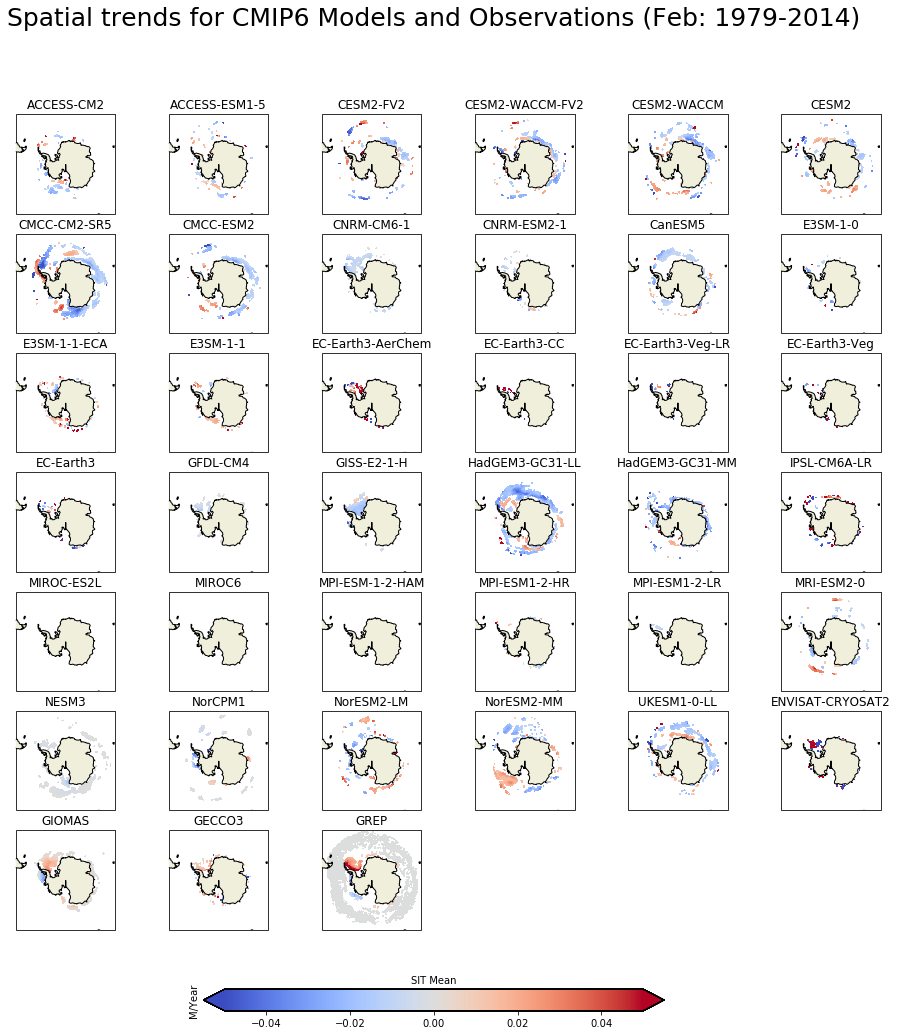

In [548]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),2)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.05)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,2)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.05)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.05),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.05, vmax=0.05)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (Feb: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

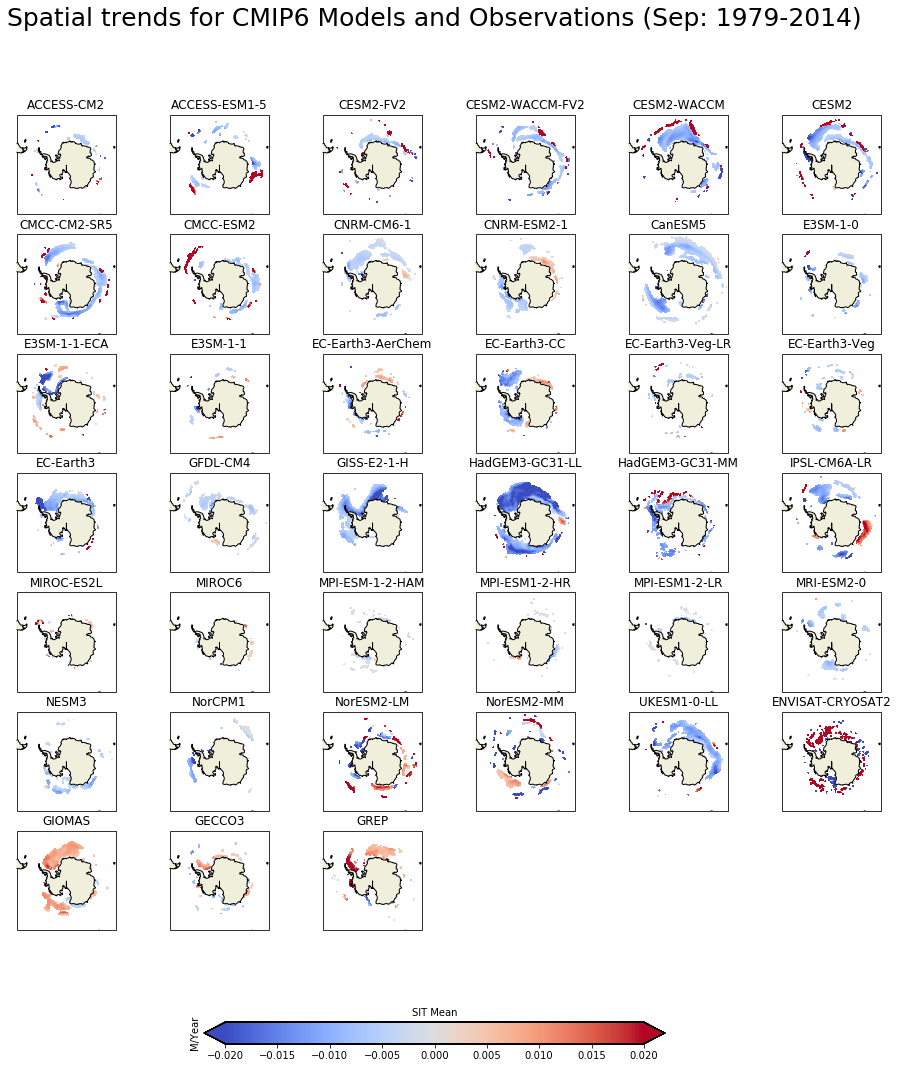

In [553]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),9)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.02)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.02, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,9)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (Sep: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

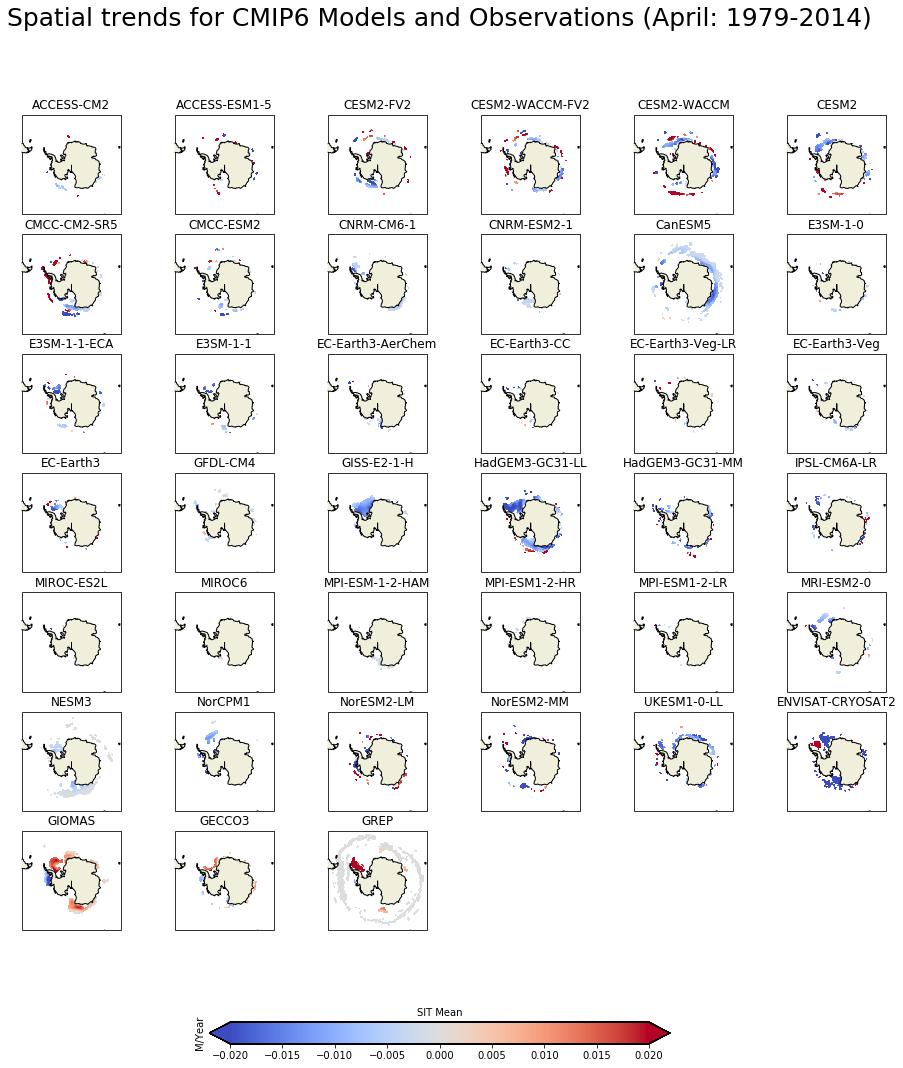

In [551]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),4)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.02)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.02, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,4)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (April: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/shreyatrivedi/miniconda3/lib/pyth

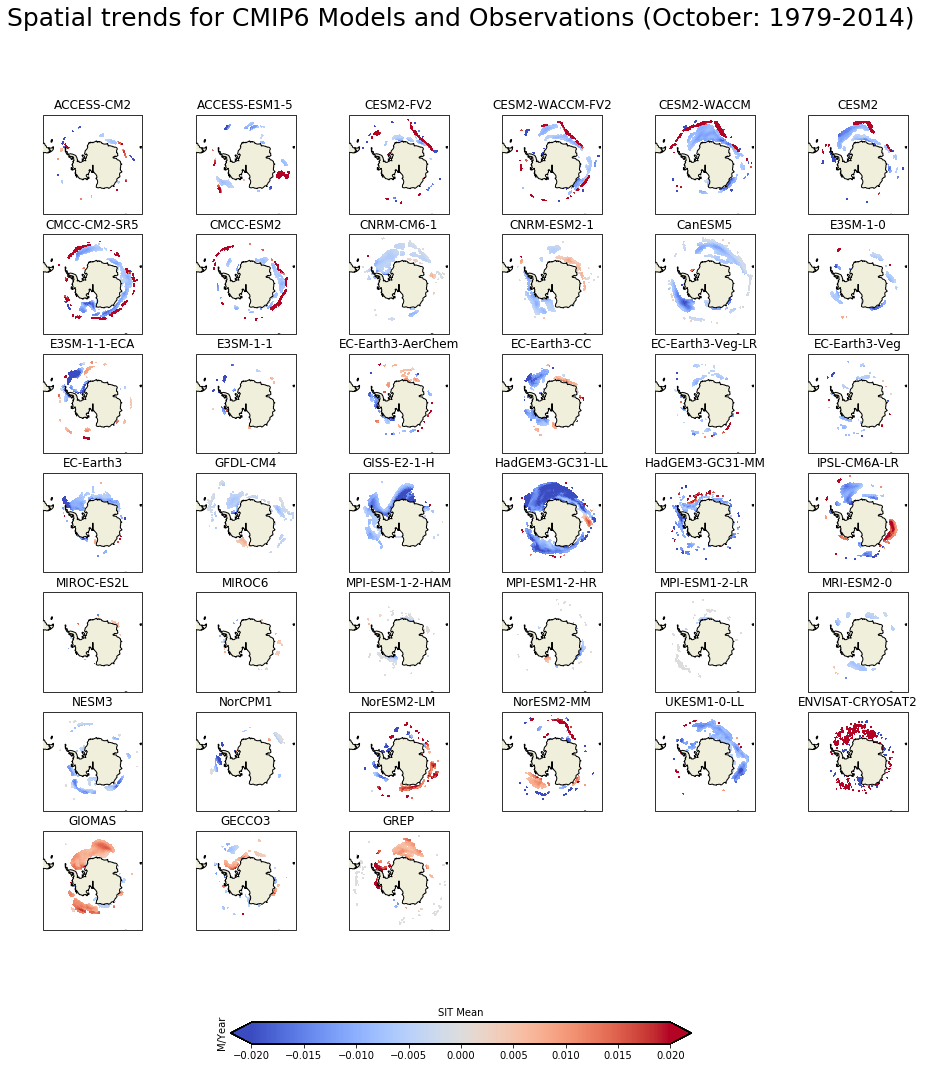

In [552]:
fig = plt.figure(figsize=[16,15])

for i in range(1,36):
    ax = plt.subplot(7,6,i,projection = ccrs.SouthPolarStereo())
    ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
    ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())
    
    data = SpatialPlots_Mon((clim_anom_RN(xr.open_dataset(mydir+myfiles[i-1]))[2]),10)
    p_val = linear_trend(data, 'time').p_value
    mask_PV = p_val.where(p_val < 0.02)

    CS = ax.pcolormesh(data.lon,data.lat,
                         (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)
    
    plt.title(xr.open_dataset(mydir1+myfiles1[i-1]).source_id)
    cbar_ax = fig.add_axes([0.3, 0.02, 0.4, 0.02]) #[left, bottom, width, height]
    cbar = fig.colorbar(CS, cax=cbar_ax,  orientation='horizontal',extend='both')

ax = plt.subplot(7,6,35,projection = ccrs.SouthPolarStereo())
plt.title("UKESM1-0-LL") 

ax = plt.subplot(7,6,36,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(sit_Obs_Regridded,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)

plt.title("ENVISAT-CRYOSAT2")


ax = plt.subplot(7,6,37,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GIOMAS_SIT,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GIOMAS")


ax = plt.subplot(7,6,38,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GECCO_SIT,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GECCO3")


ax = plt.subplot(7,6,39,projection = ccrs.SouthPolarStereo())
ax.add_feature(cfeature.LAND,zorder=100,edgecolor='k')
ax.set_extent([0.005, 360, -90, -50], crs=ccrs.PlateCarree())

data = SpatialPlots_Mon(GREP_SIT,10)
p_val = linear_trend((data), 'time').p_value
mask_PV = p_val.where(p_val < 0.02)

CS = ax.pcolormesh(data.lon,data.lat,
                     (linear_trend(data, 'time').slope).where(mask_PV < 0.02),
                     transform=ccrs.PlateCarree(),cmap = plt.cm.coolwarm, vmin=-0.02, vmax=0.02)


plt.title("GREP")


fig.suptitle("Spatial trends for CMIP6 Models and Observations (October: 1979-2014)",fontsize=25)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('SIT Mean',fontsize=10)
cbar.ax.set_ylabel('M/Year', fontsize=10)

# plt.savefig('Spatial_Trends_Adv.pdf',dpi=200)

plt.show()
plt.close()